In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sw
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn
from sklearn.feature_selection import RFE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

d:\MoreTech5\MoreTech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
employees = pd.read_csv('datasets/employees.csv', encoding='utf-8')
students = pd.read_csv('datasets/Students Performance .csv', encoding='utf-8')
employees2 = pd.read_csv('datasets/Uncleaned_employees_final_dataset (1).csv', encoding='utf-8')


# First show

In [3]:
employees.head()

,Employee_Name,Employee_Id,Project_Id,Start_Date,End_Date,Allocated_Days,Completed_In_Days,Login_Time,Logout_Time,isOnTime,Joining_Date,Appraisal_Cycles
0,Lisa Ramos,0,7175,2016-06-09,2018-10-13,863,856,9:54,7:53,1,2015-07-13,2
1,Paul Rivera,1,5869,2017-05-27,2017-09-18,110,114,10:5,7:18,1,2016-08-07,0
2,John Kaul,2,7692,2013-05-06,2015-01-22,630,626,10:45,7:4,0,2012-10-24,1
3,Keely Jackson,3,5414,2018-12-26,2020-09-24,629,638,10:23,8:41,1,2018-10-23,0
4,Joseph Irby,4,7774,2013-04-28,2017-01-15,1358,1358,10:52,7:46,0,2013-04-03,4


In [4]:
employees2.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
students.head()


,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


# Main info of dataset

In [6]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10823 entries, 0 to 10822
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_Name      10823 non-null  object
 1   Employee_Id        10823 non-null  int64 
 2   Project_Id         10823 non-null  int64 
 3   Start_Date         10823 non-null  object
 4   End_Date           10823 non-null  object
 5   Allocated_Days     10823 non-null  int64 
 6   Completed_In_Days  10823 non-null  int64 
 7   Login_Time         10823 non-null  object
 8   Logout_Time        10823 non-null  object
 9   isOnTime           10823 non-null  int64 
 10  Joining_Date       10823 non-null  object
 11  Appraisal_Cycles   10823 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1014.8+ KB


In [7]:
employees.describe()

,Employee_Id,Project_Id,Allocated_Days,Completed_In_Days,isOnTime,Appraisal_Cycles
count,10823.000000,10823.000000,10823.000000,10823.000000,10823.000000,10823.000000
mean,5411.000000,5504.512612,2069.043703,2069.066710,0.495519,5.201885
std,3124.475316,2598.129765,1623.178651,1623.211738,0.500003,4.450615
min,0.000000,1000.000000,-5.000000,0.000000,0.000000,0.000000
25%,2705.500000,3271.000000,745.000000,743.500000,0.000000,2.000000
50%,5411.000000,5477.000000,1657.000000,1659.000000,0.000000,4.000000
75%,8116.500000,7774.000000,3092.500000,3092.000000,1.000000,8.000000
max,10822.000000,9998.000000,7357.000000,7356.000000,1.000000,19.000000


In [8]:
employees2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [9]:
employees2.describe()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [10]:
students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          145 non-null    object
 1   Student_Age         145 non-null    object
 2   Sex                 145 non-null    object
 3   High_School_Type    145 non-null    object
 4   Scholarship         144 non-null    object
 5   Additional_Work     145 non-null    object
 6   Sports_activity     145 non-null    object
 7   Transportation      145 non-null    object
 8   Weekly_Study_Hours  145 non-null    int64 
 9   Attendance          145 non-null    object
 10  Reading             145 non-null    object
 11  Notes               145 non-null    object
 12  Listening_in_Class  145 non-null    object
 13  Project_work        145 non-null    object
 14  Grade               145 non-null    object
dtypes: int64(1), object(14)
memory usage: 17.1+ KB


In [11]:
students.describe()


,Weekly_Study_Hours
count,145.000000
mean,2.331034
std,4.249273
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,12.000000


# Expanded info

Feature: Employee_Name                       |▊         | [  8%]   00:00 -> (00:00 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: Start_Date                          |███       | [ 31%]   00:00 -> (00:02 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: End_Date                            |███▊      | [ 38%]   00:00 -> (00:02 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i


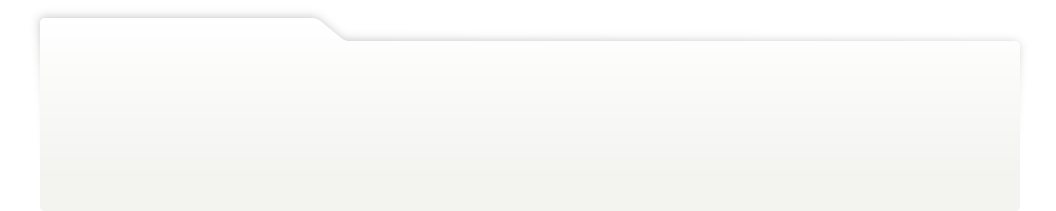
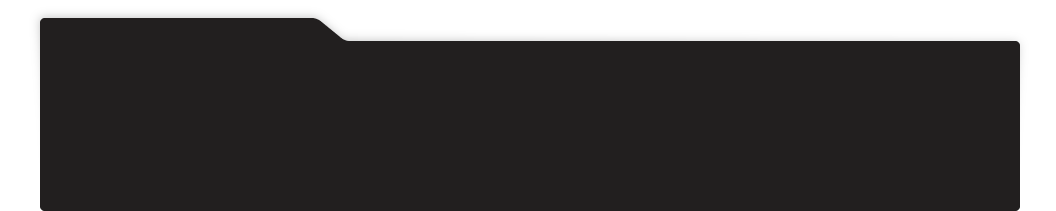
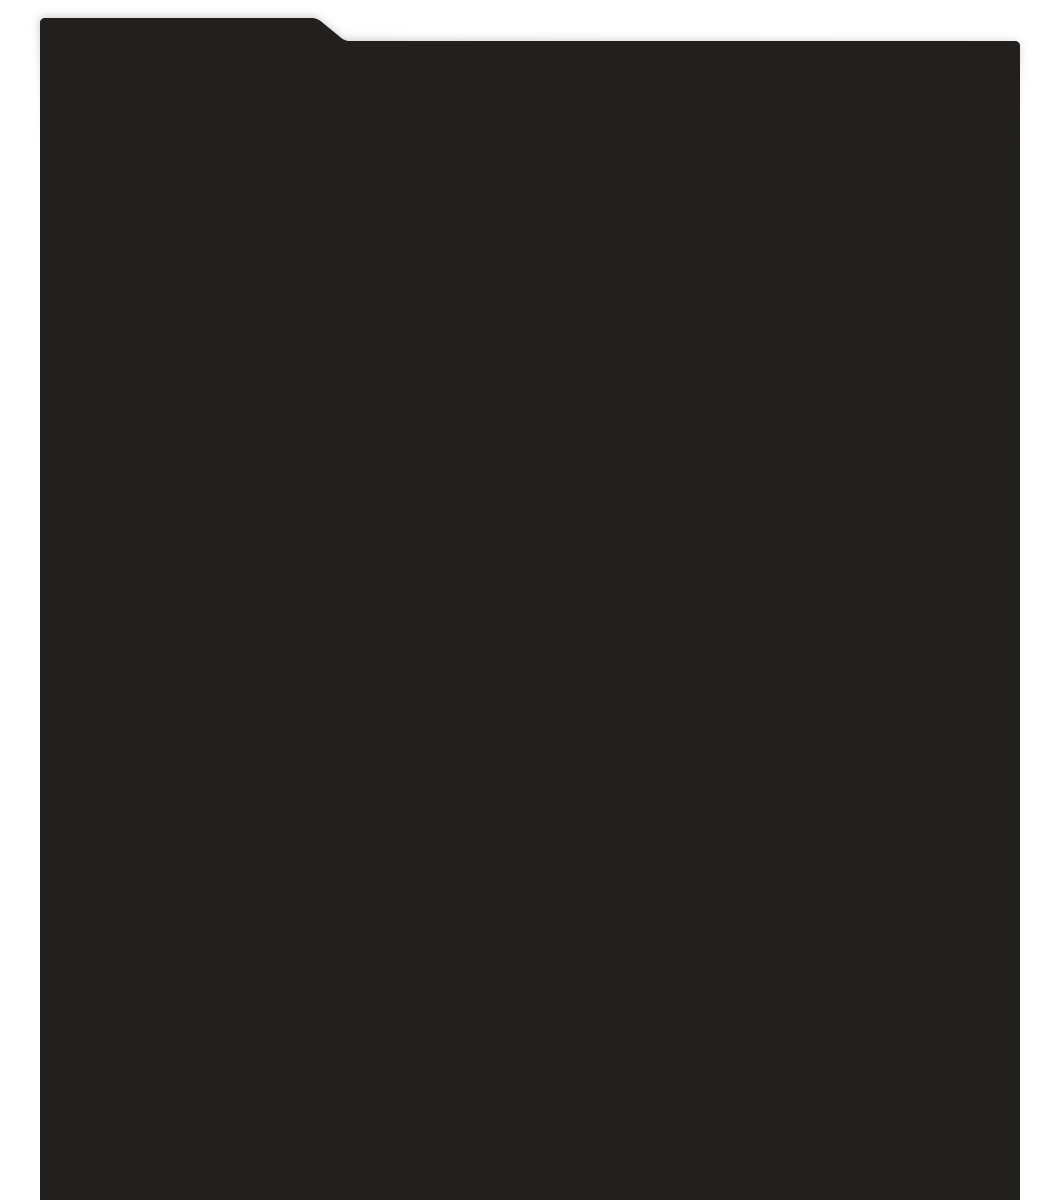
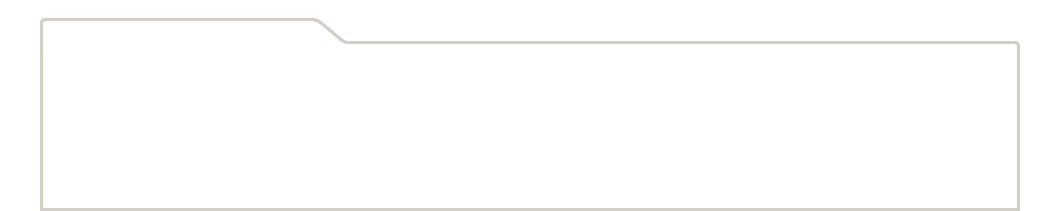
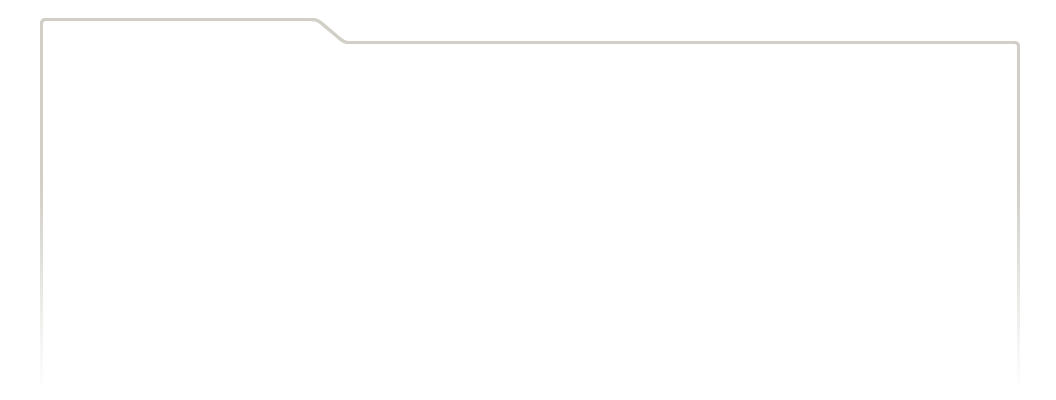
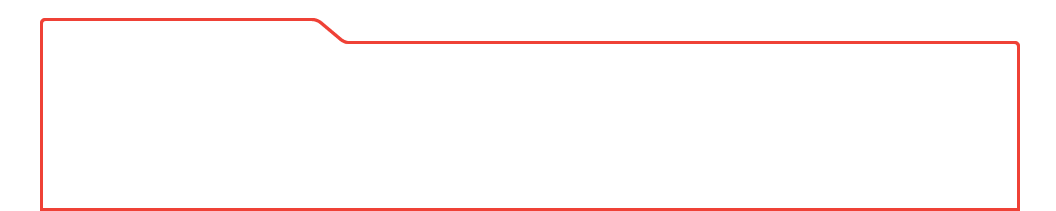
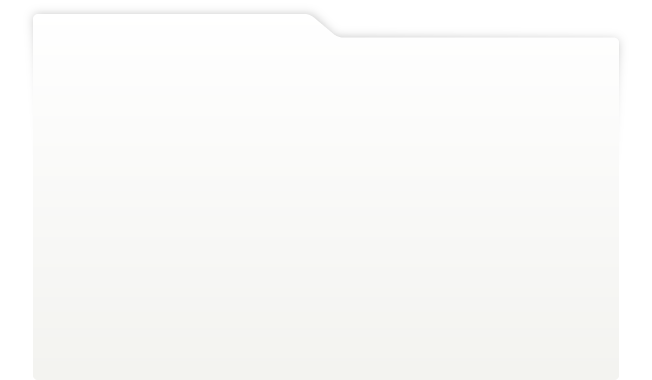
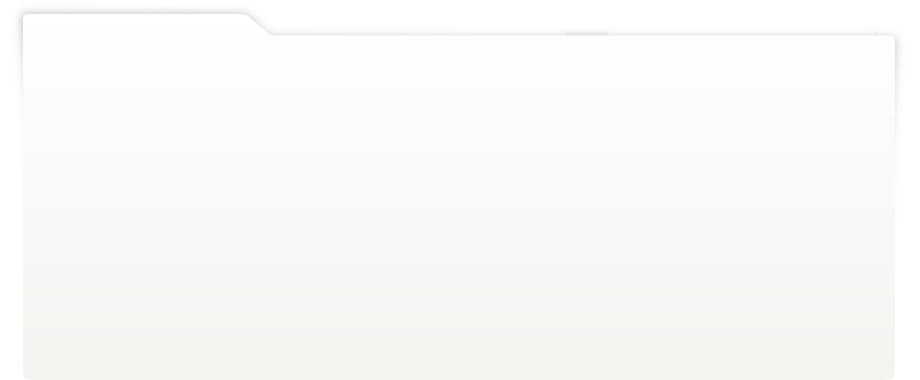
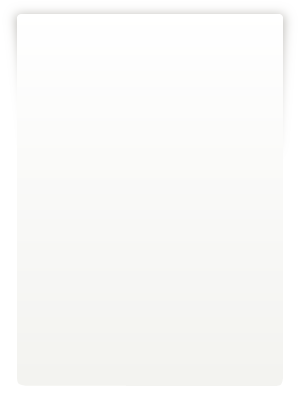
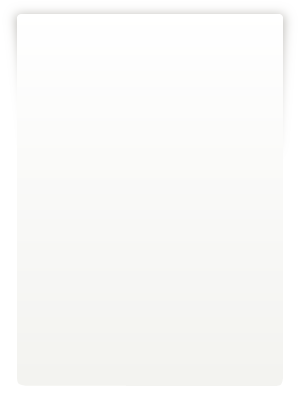
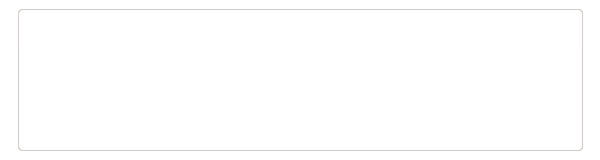
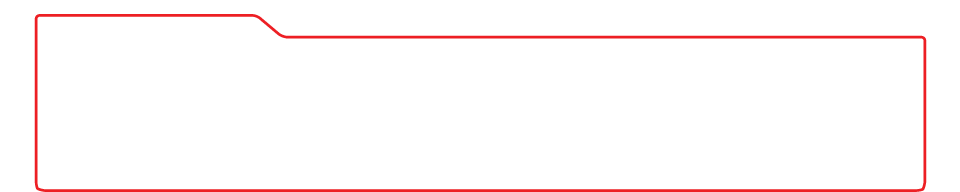
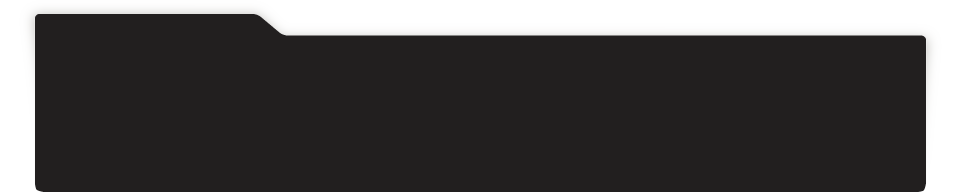
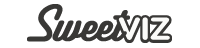
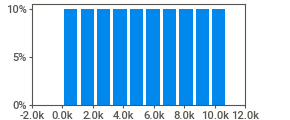
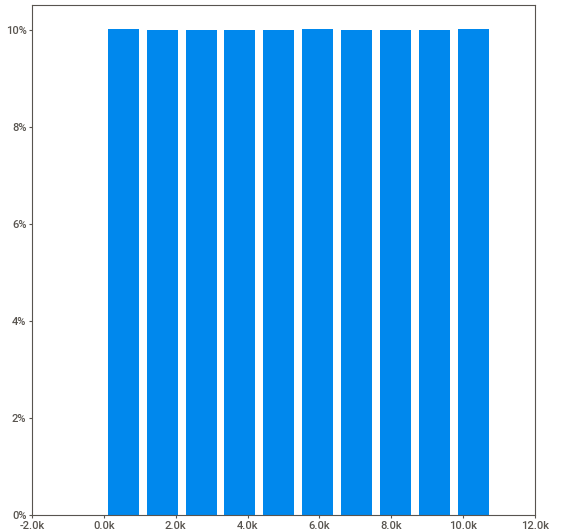
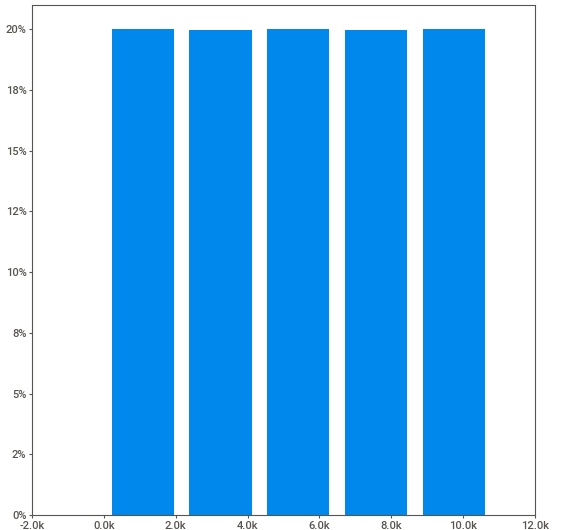
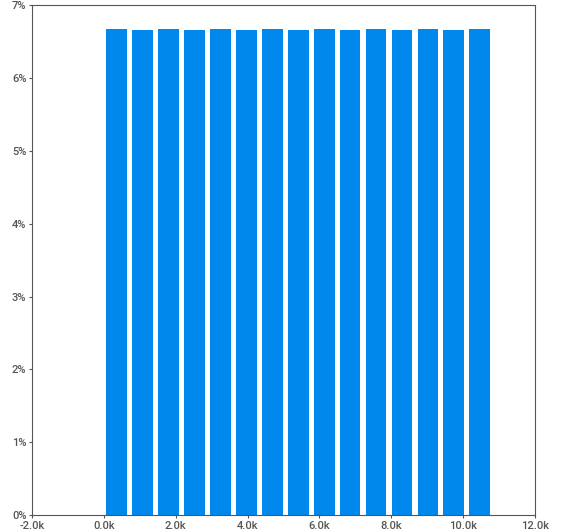
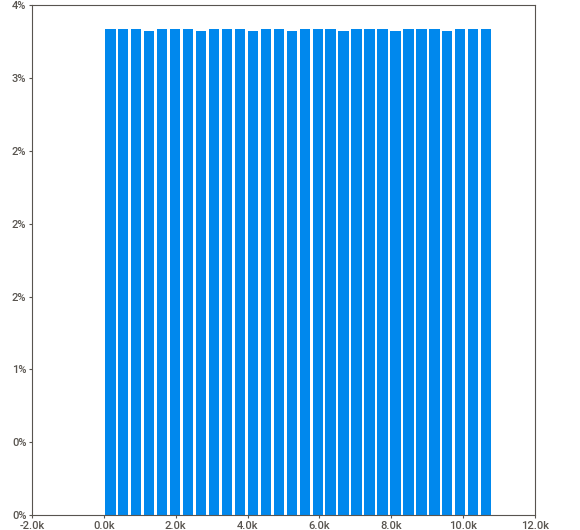
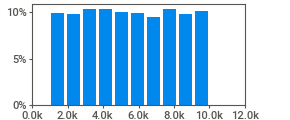
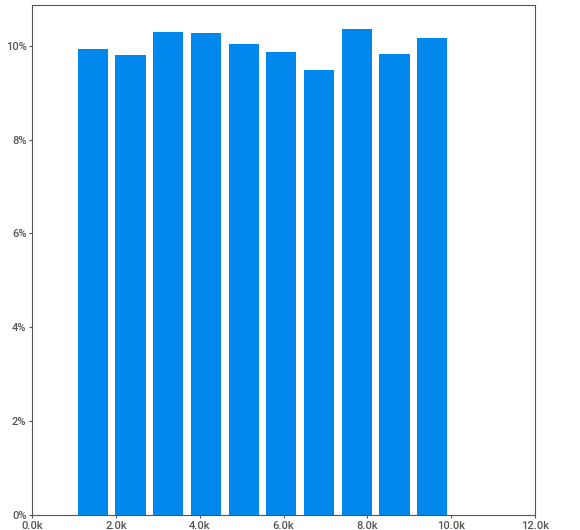
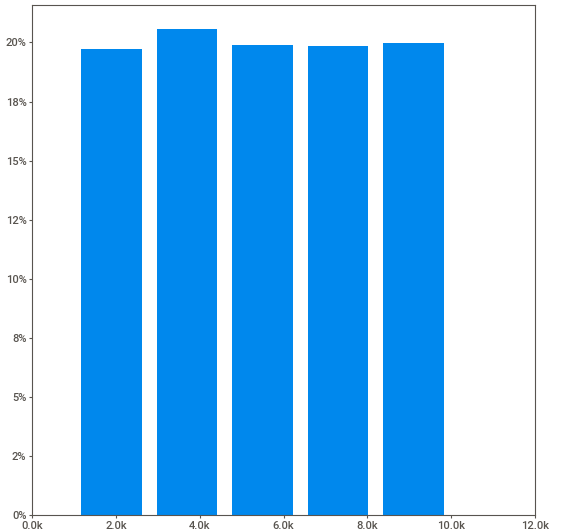
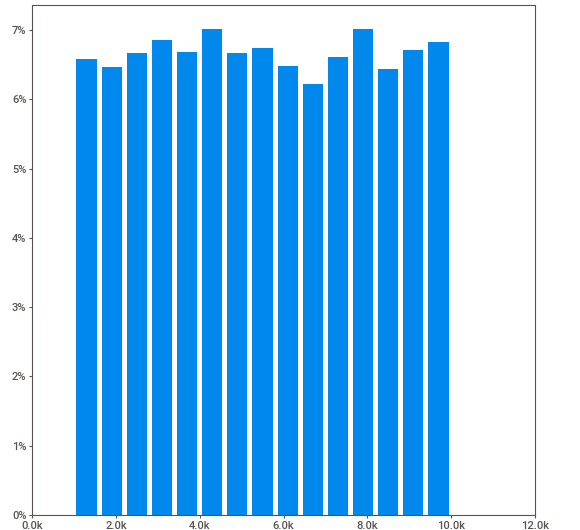
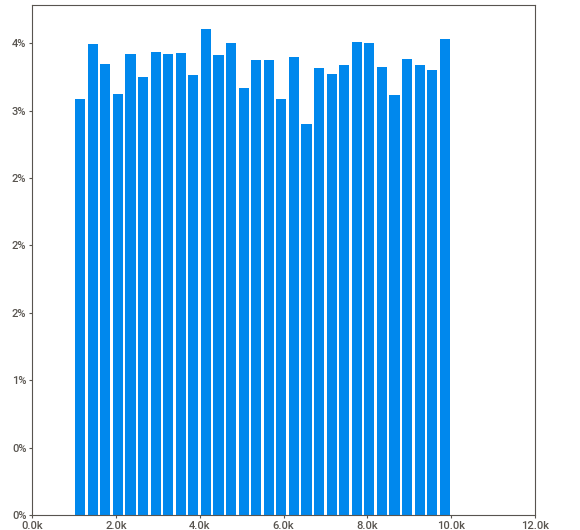
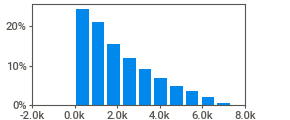
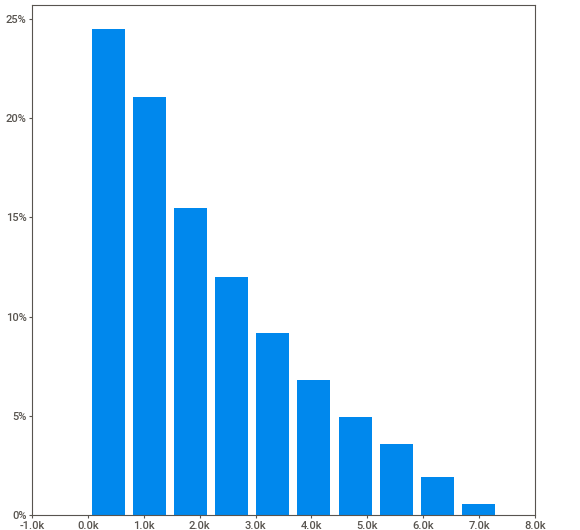
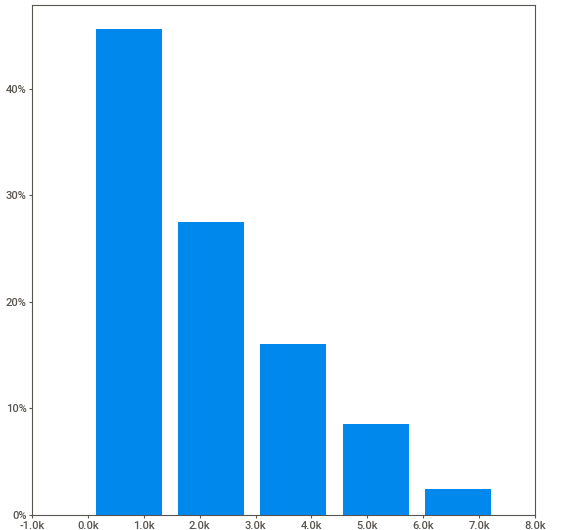
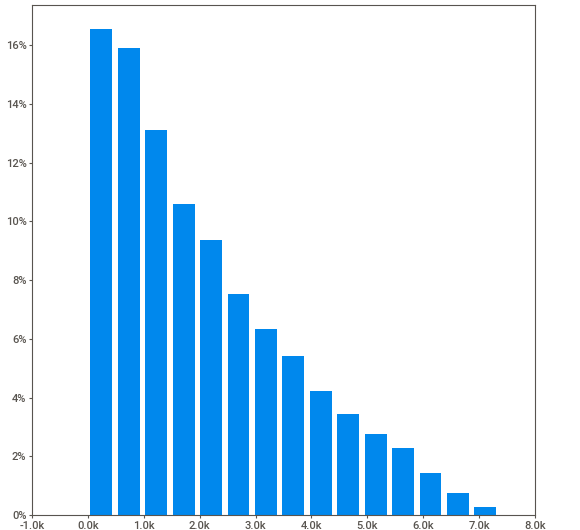
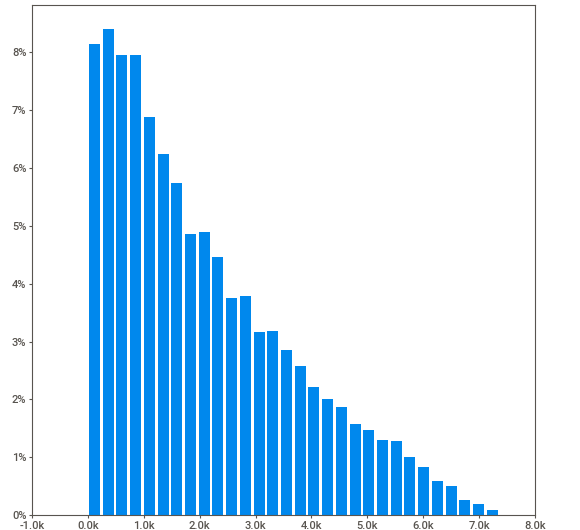
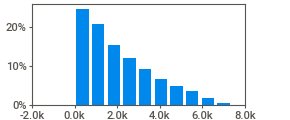
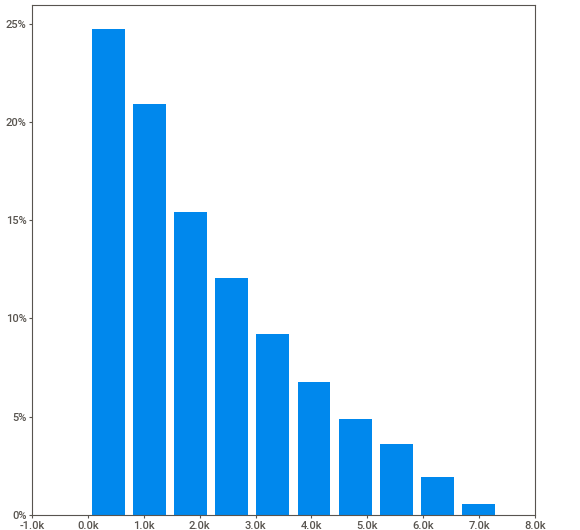
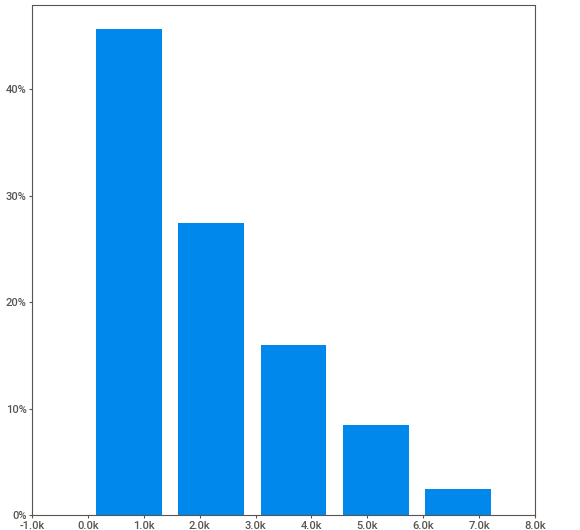
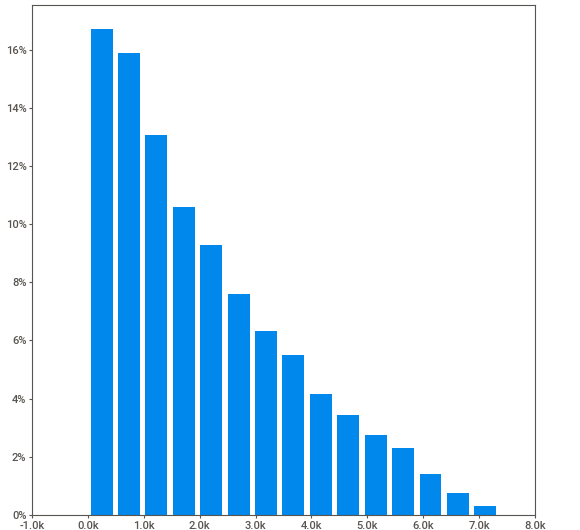
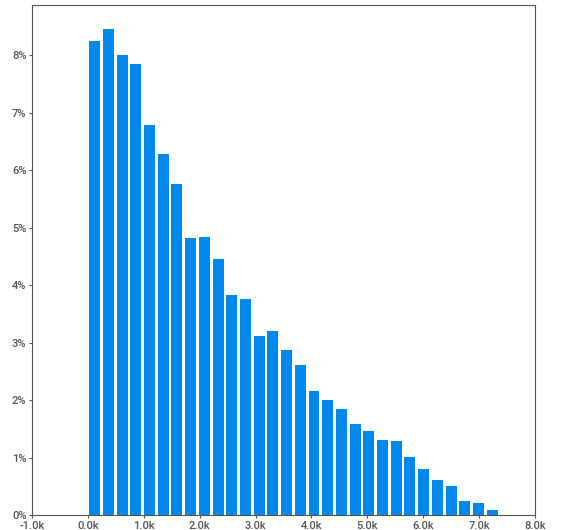
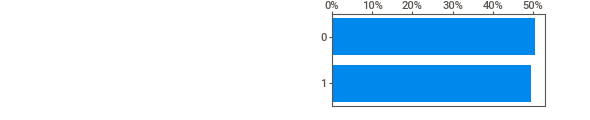
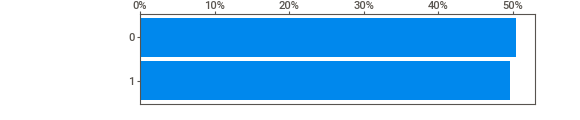
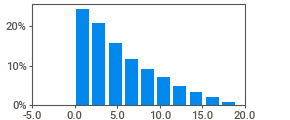
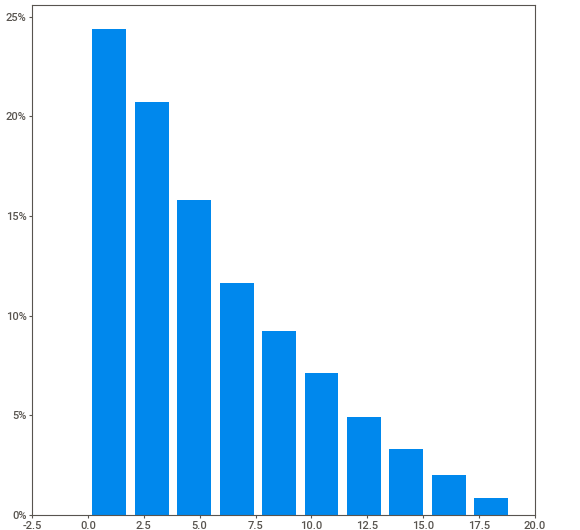
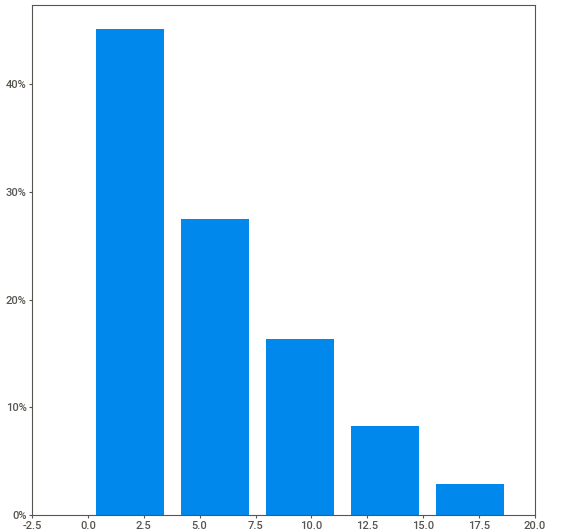
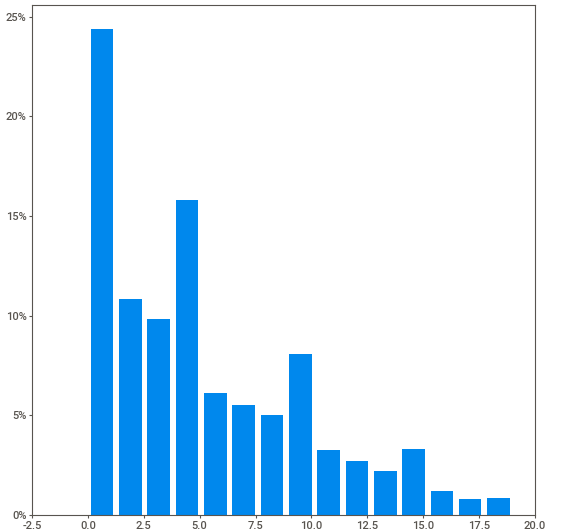
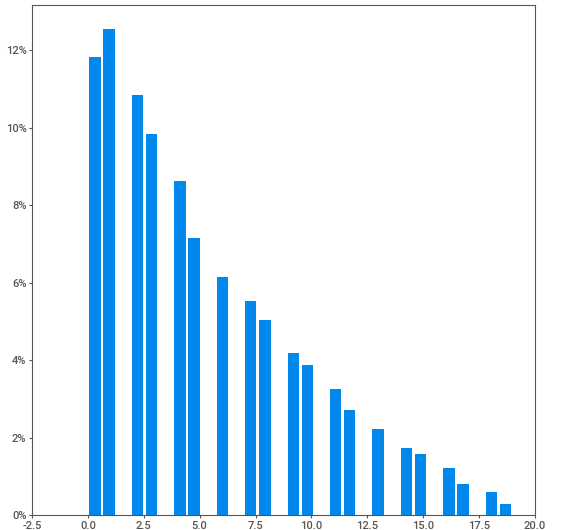
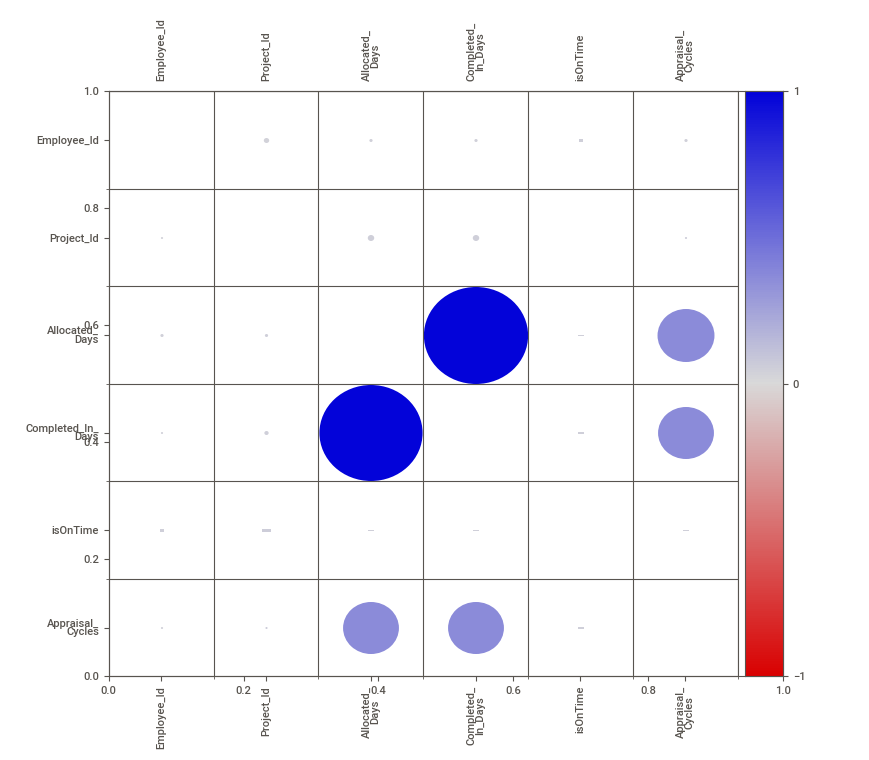
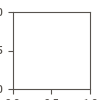

In [12]:
sw.analyze(employees).show_notebook()

Feature: department                          |█▍        | [ 14%]   00:00 -> (00:02 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: region                              |██▏       | [ 21%]   00:00 -> (00:01 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: education                           |██▊       | [ 29%]   00:00 -> (00:01 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i


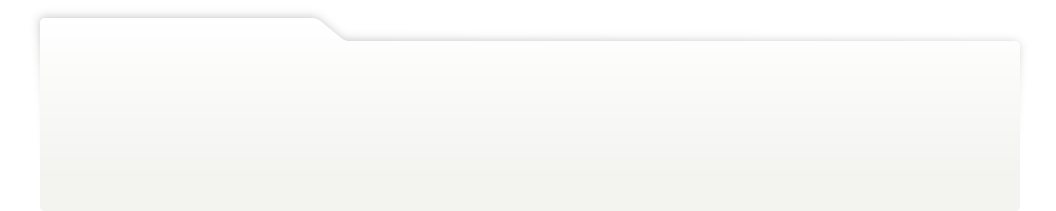
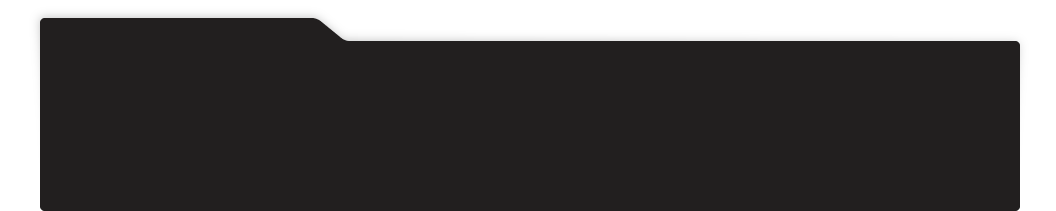
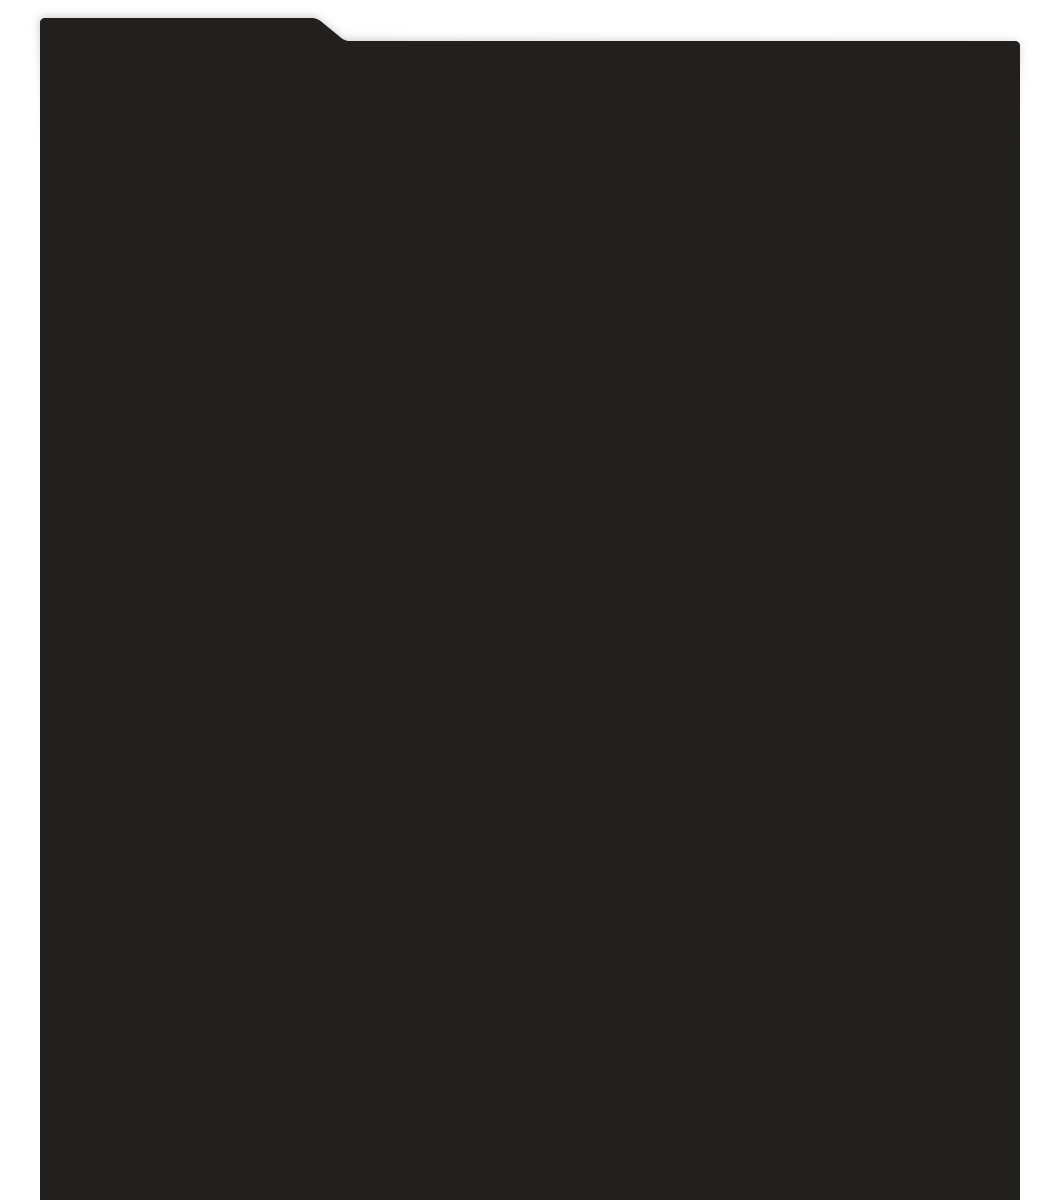
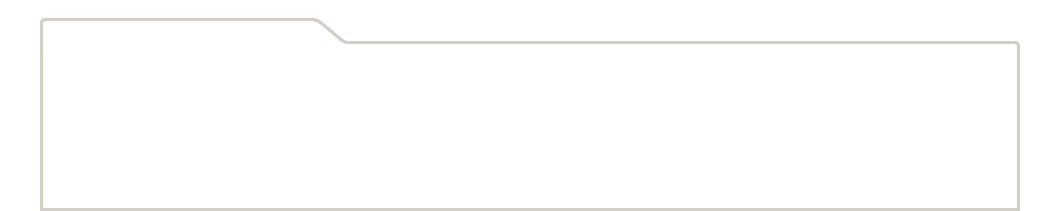
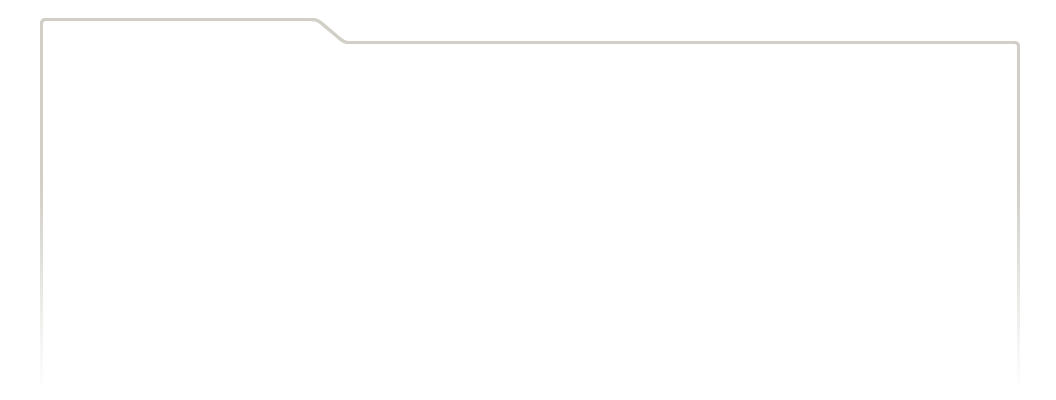
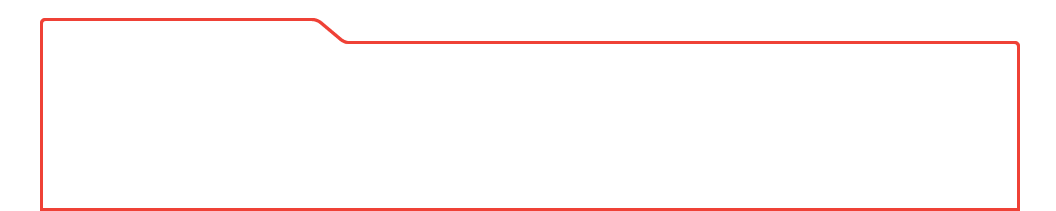
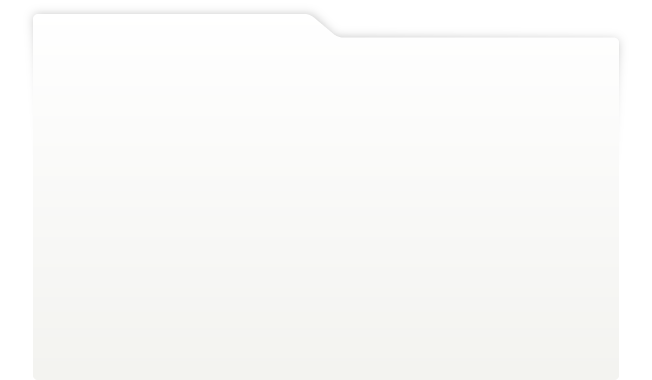
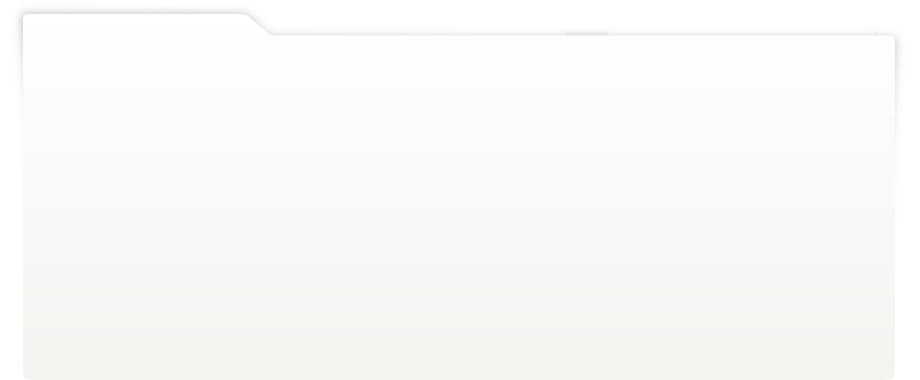
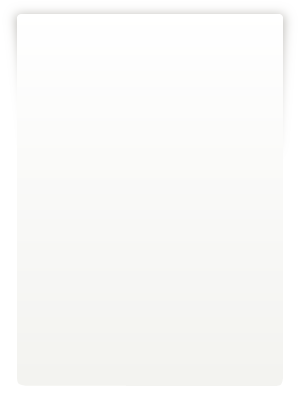
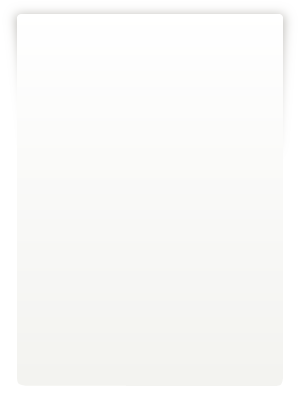
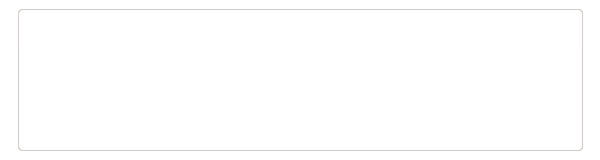
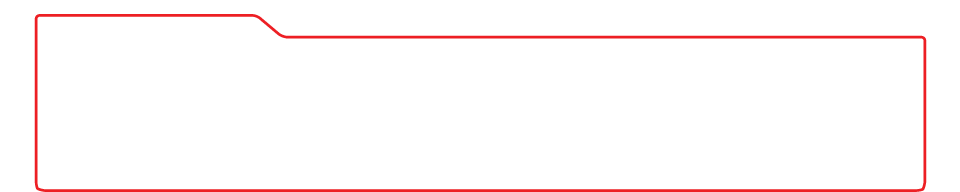
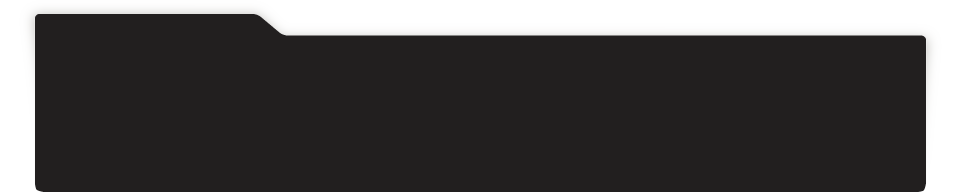
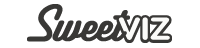
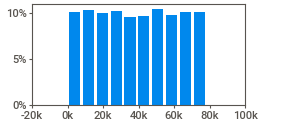
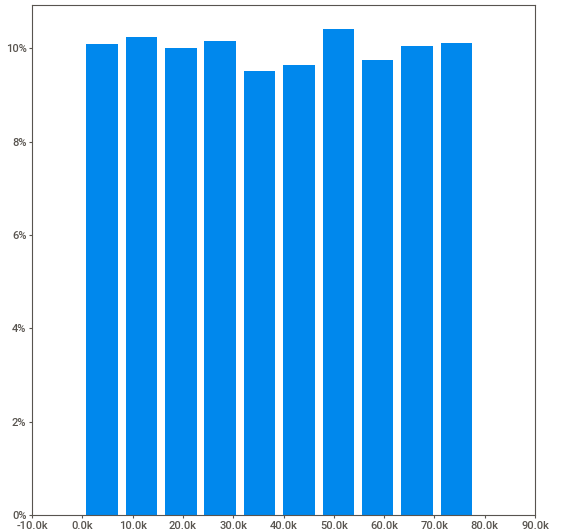
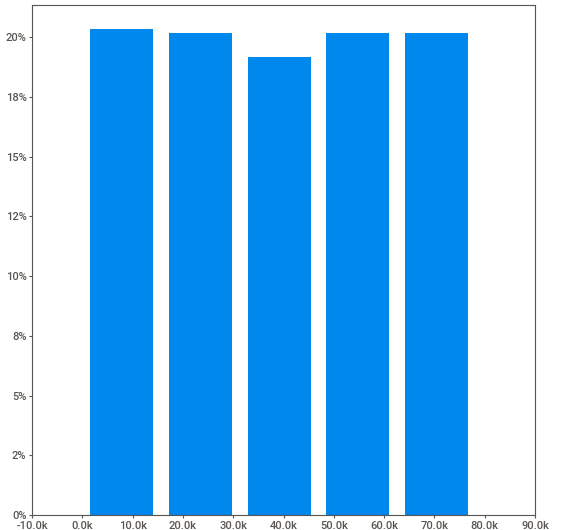
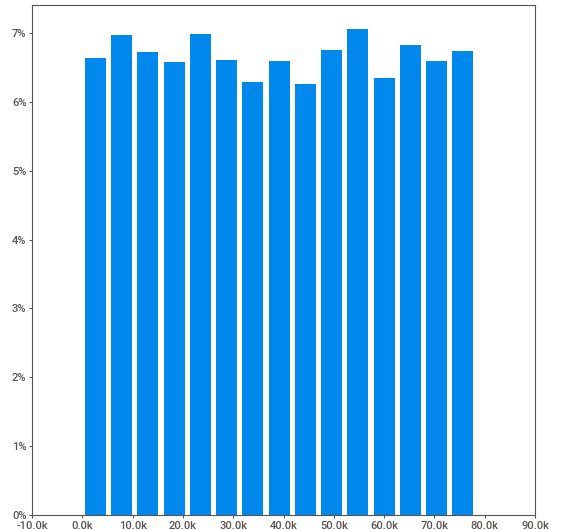
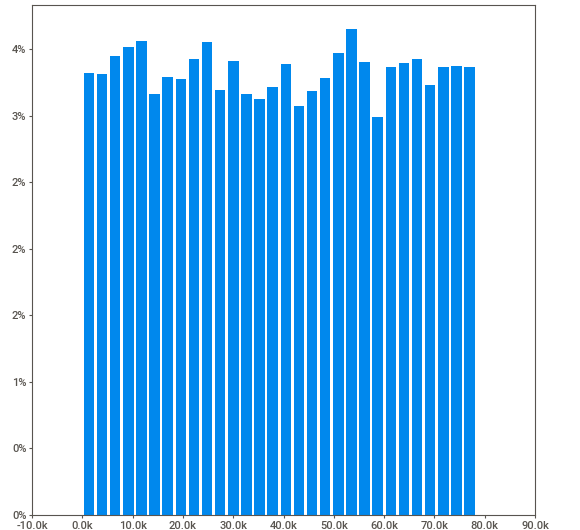
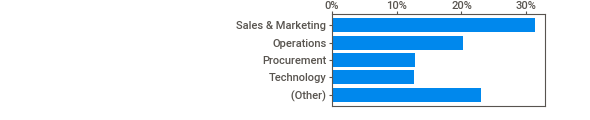
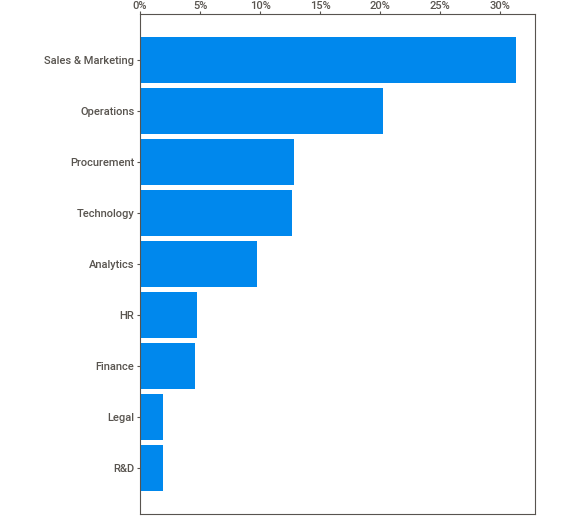
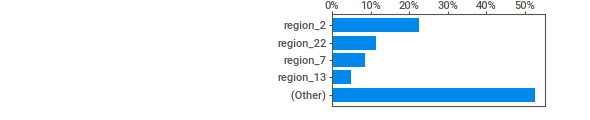
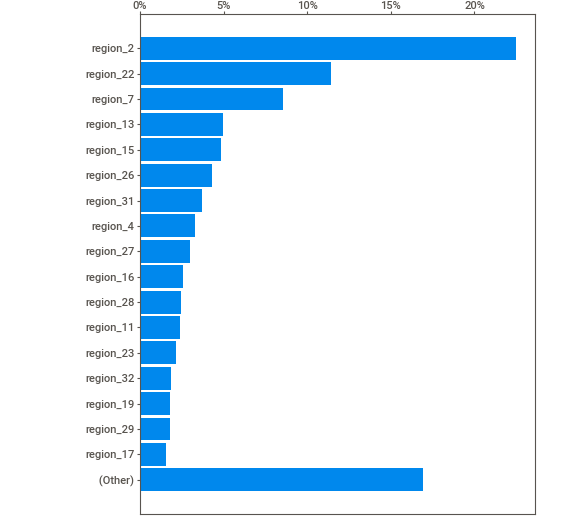
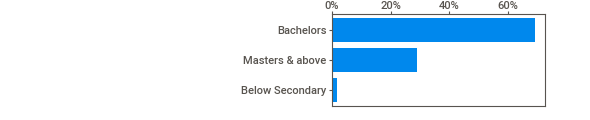
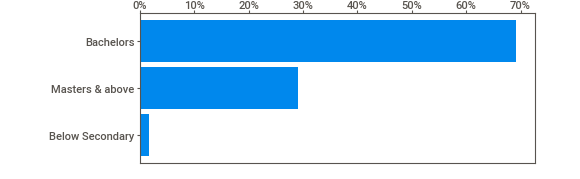
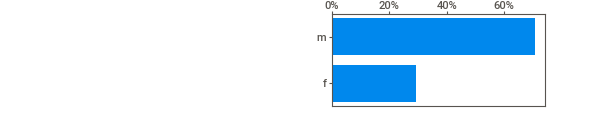
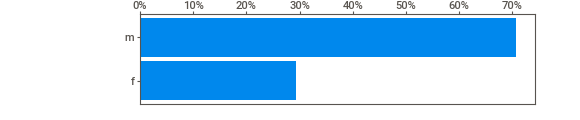
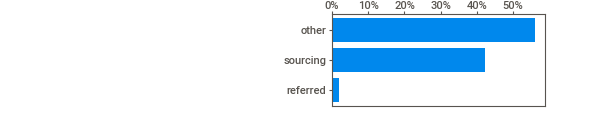
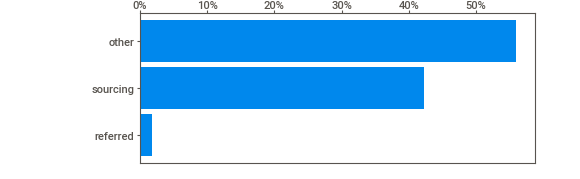
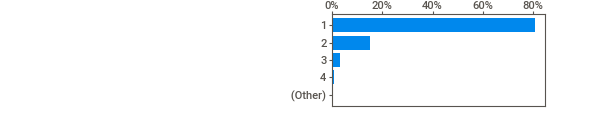
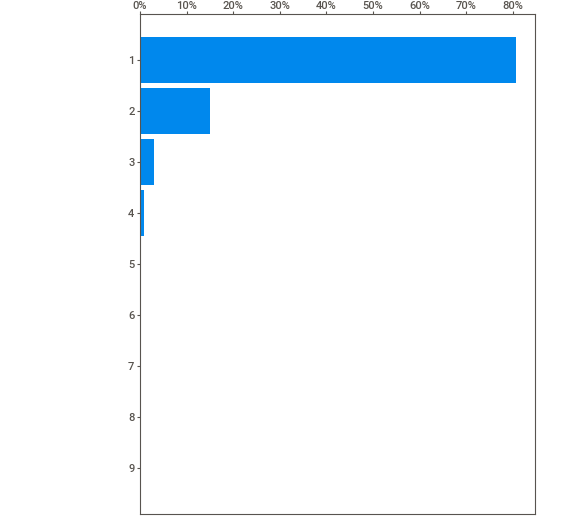
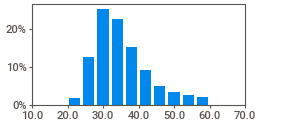
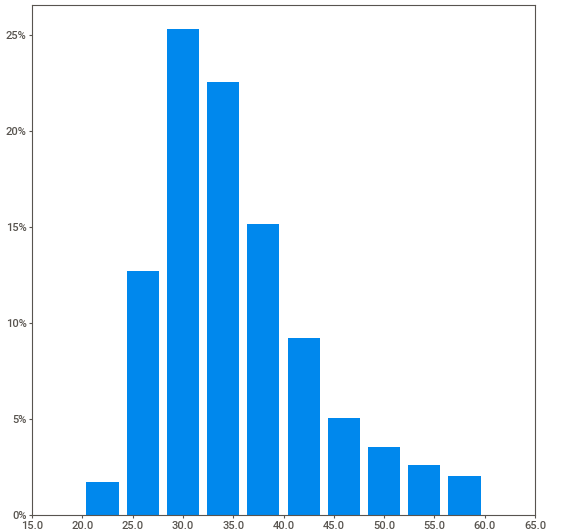
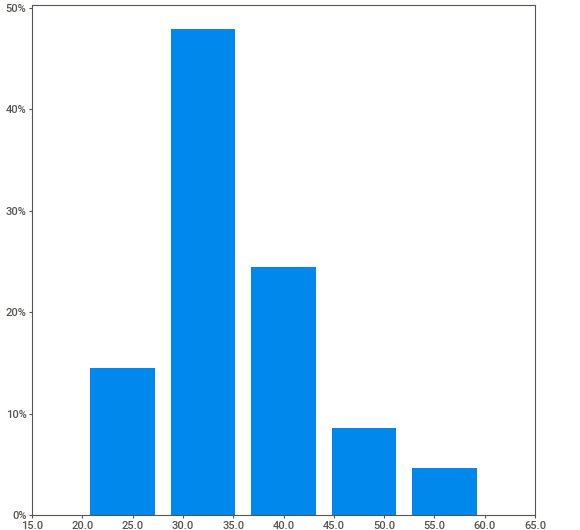
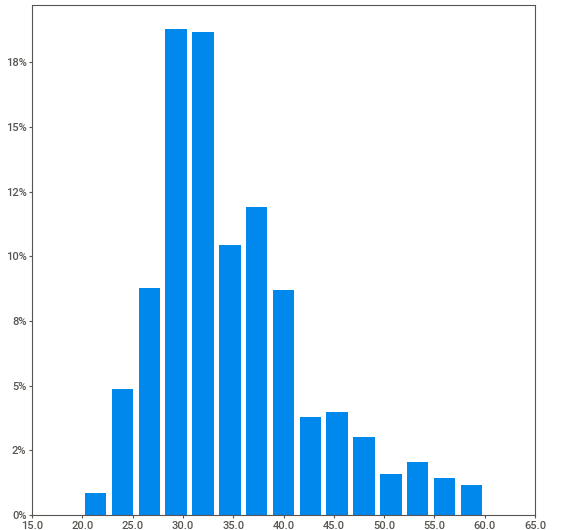
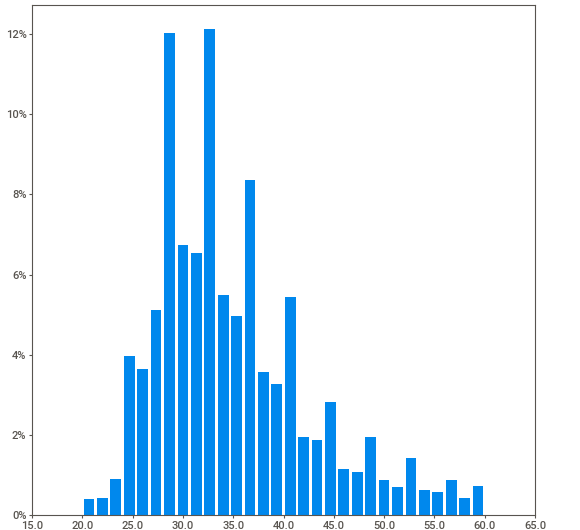
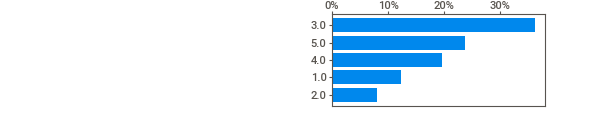
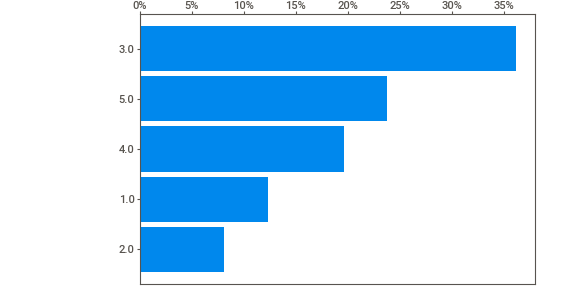
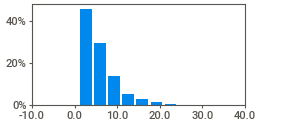
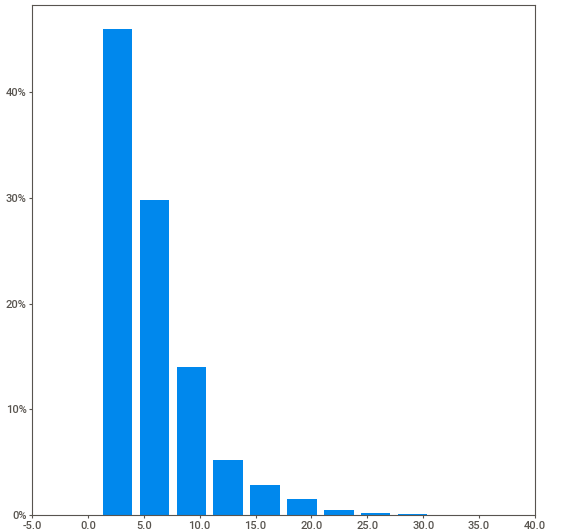
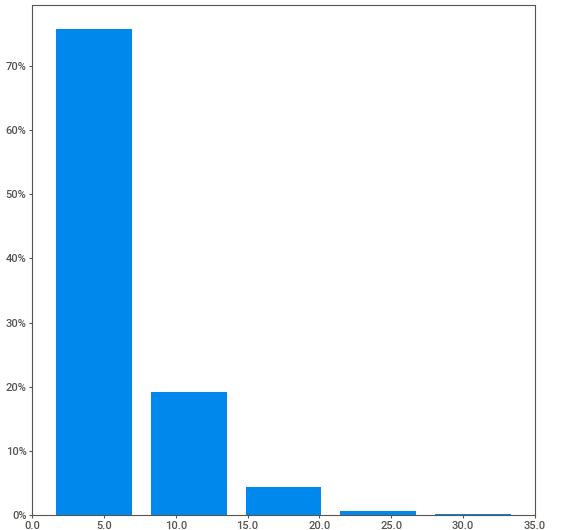
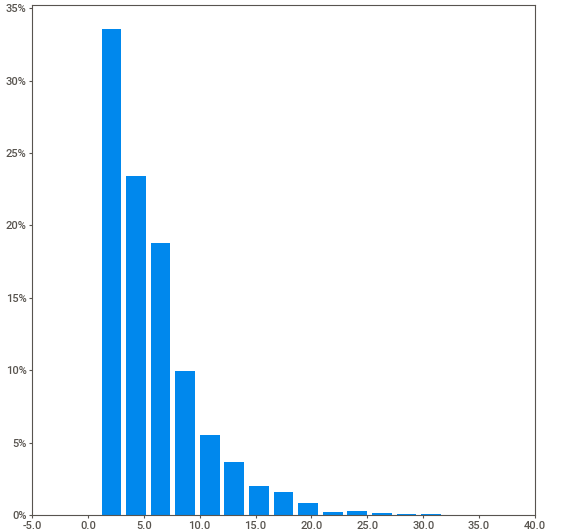
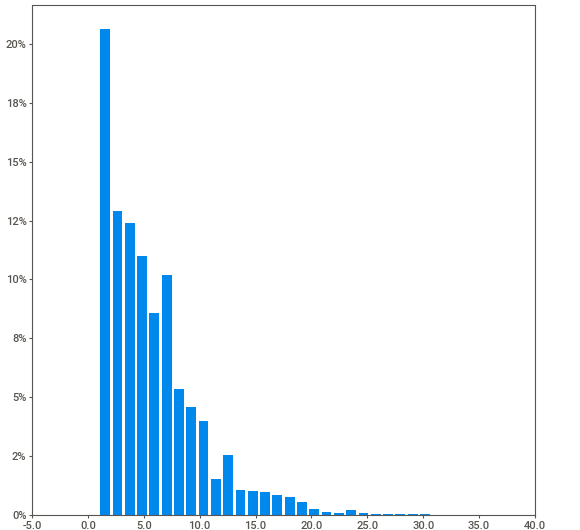
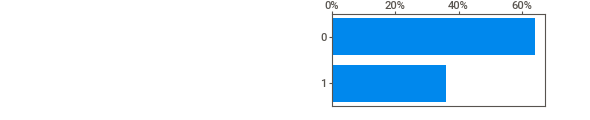
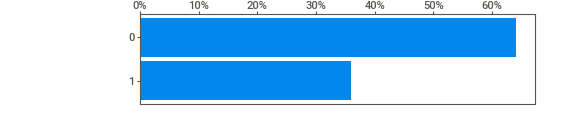
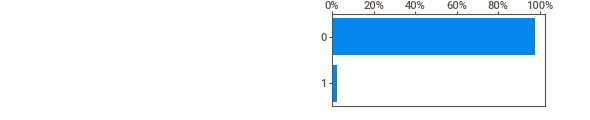
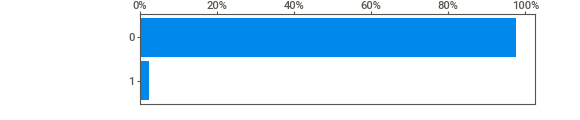
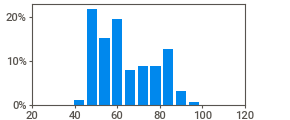
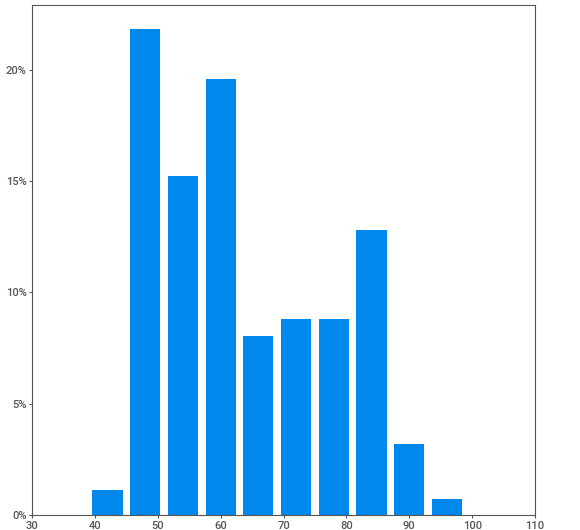
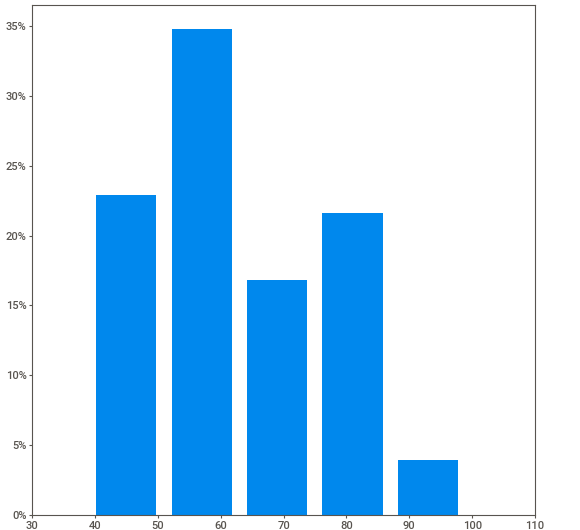
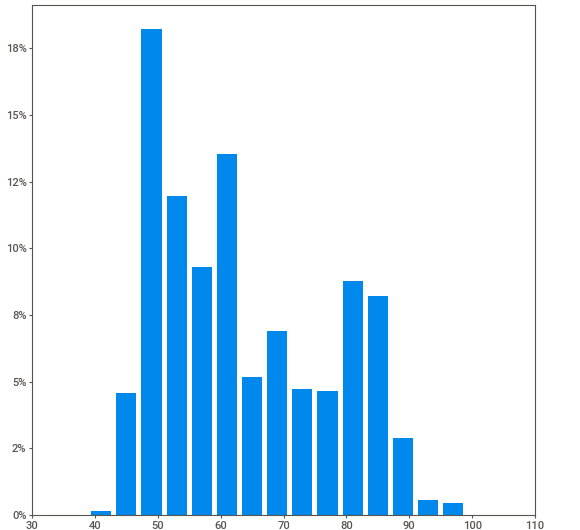
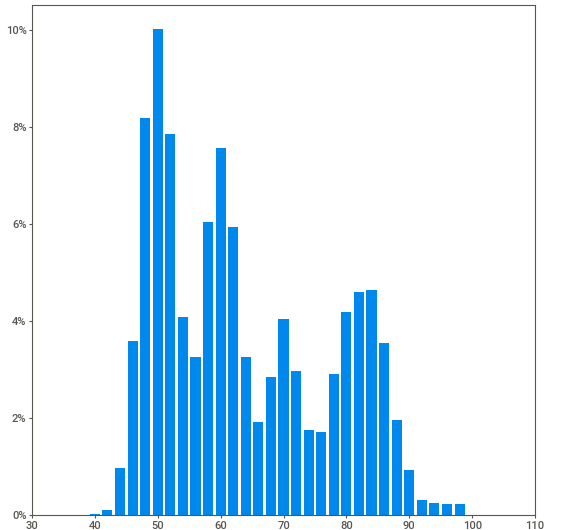
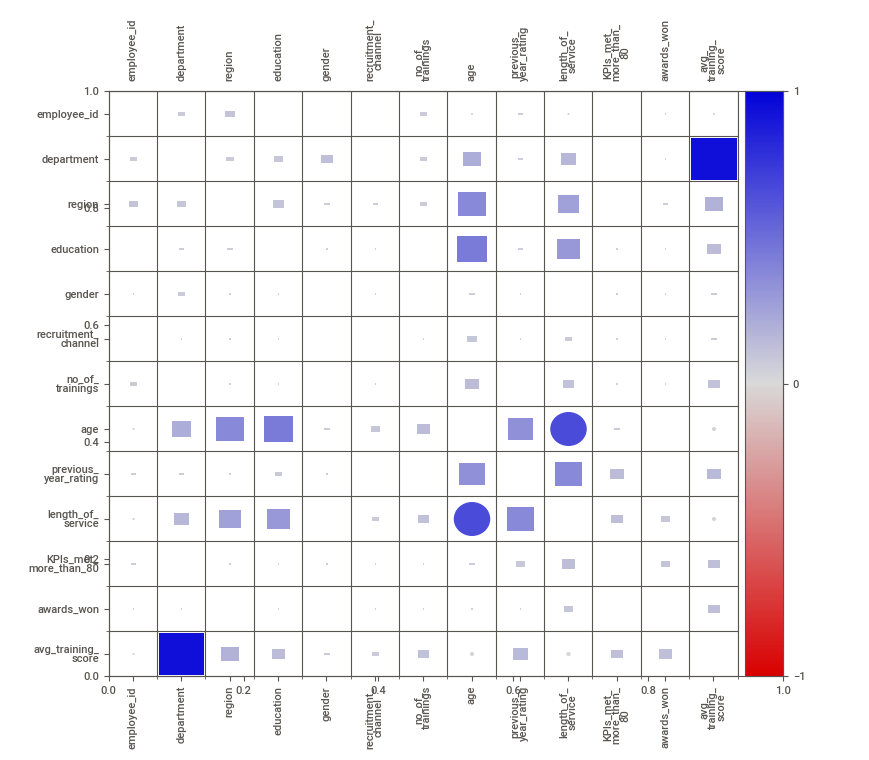
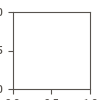

In [13]:
sw.analyze(employees2).show_notebook()


Feature: Student_ID                          |▋         | [  6%]   00:00 -> (00:00 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: Student_Age                         |█▎        | [ 12%]   00:00 -> (00:00 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: Sex                                 |█▉        | [ 19%]   00:00 -> (00:00 left)d:\MoreTech5\MoreTech\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i


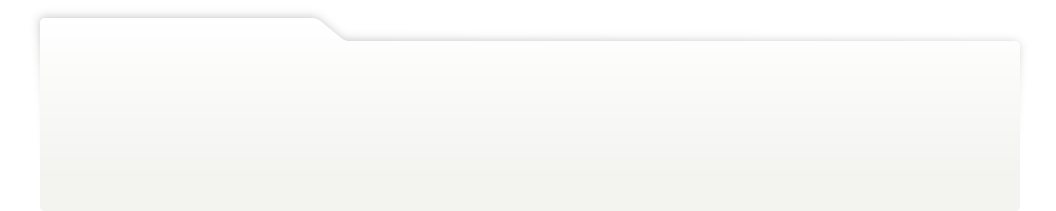
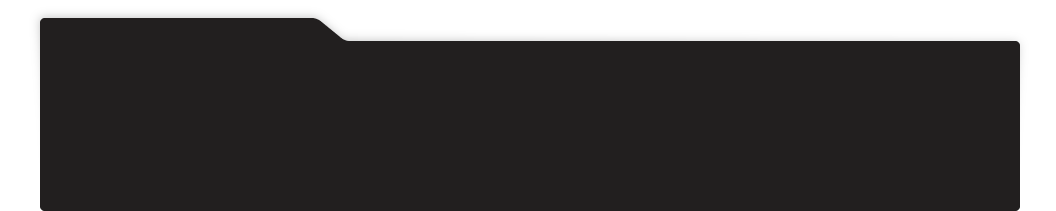
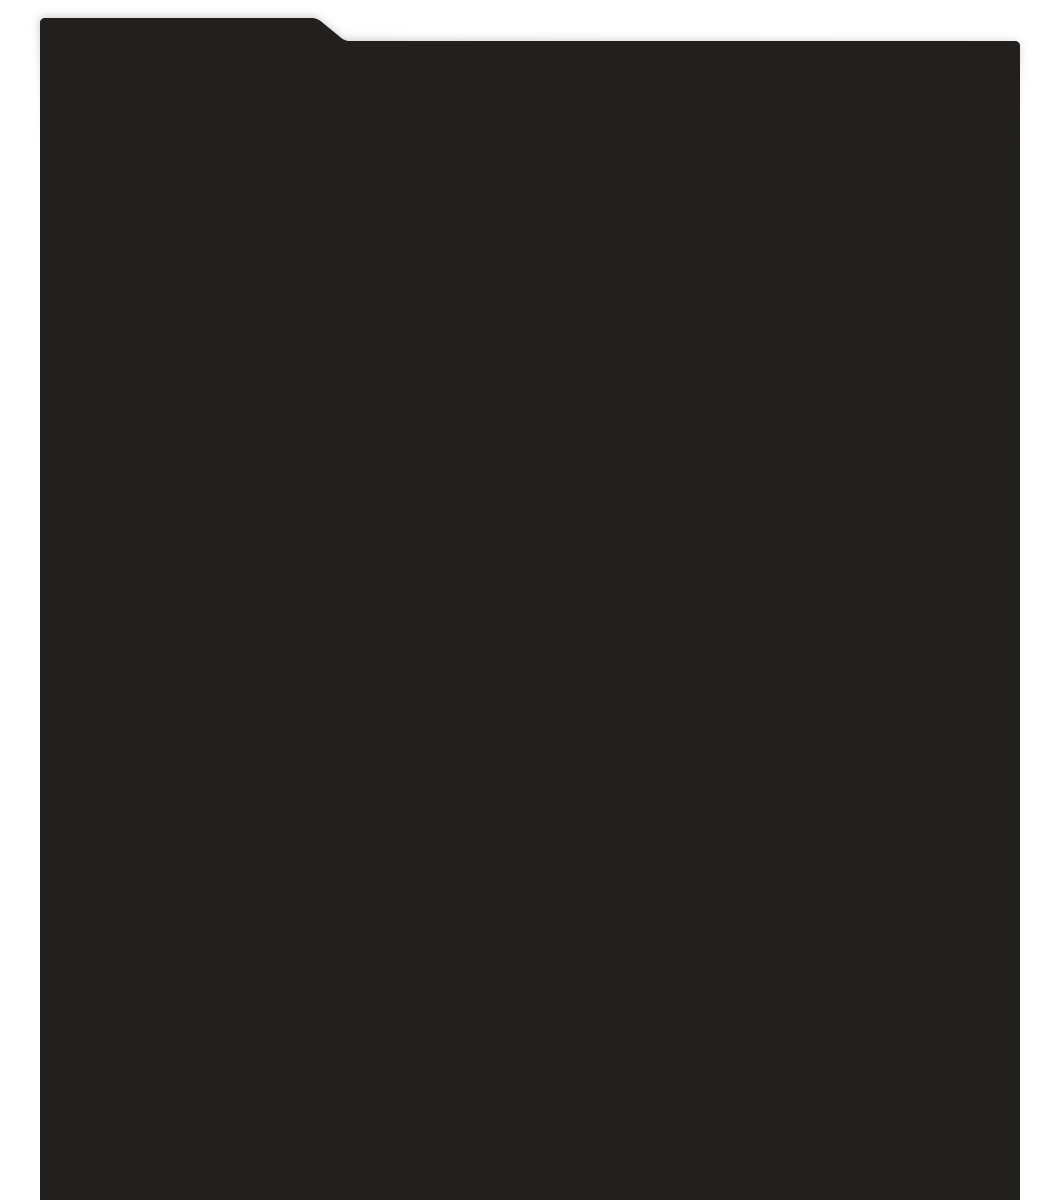
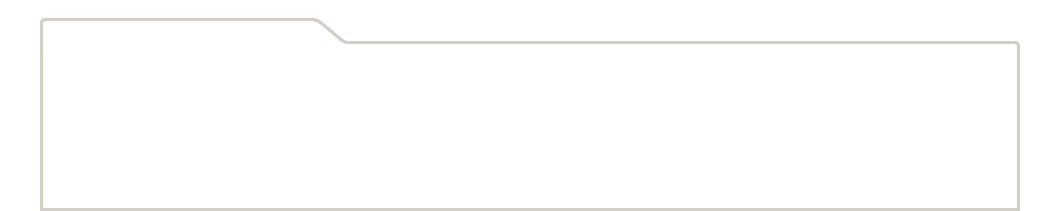
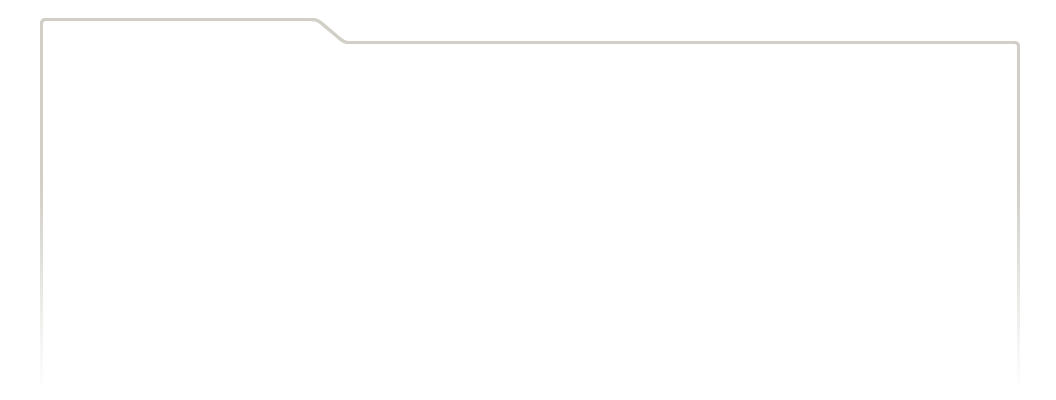
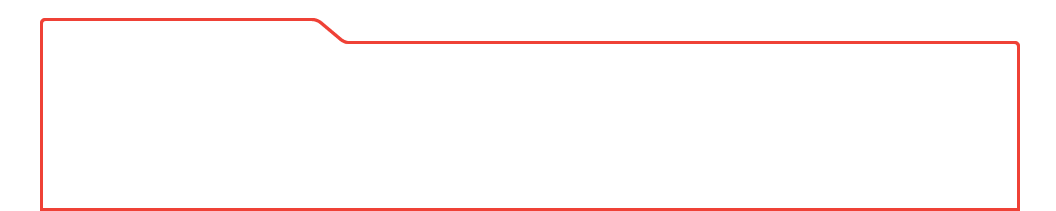
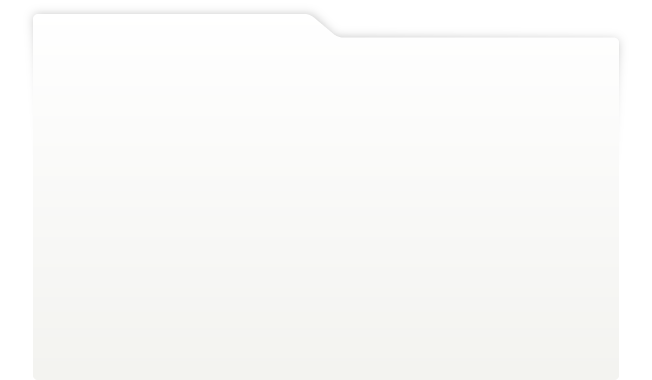
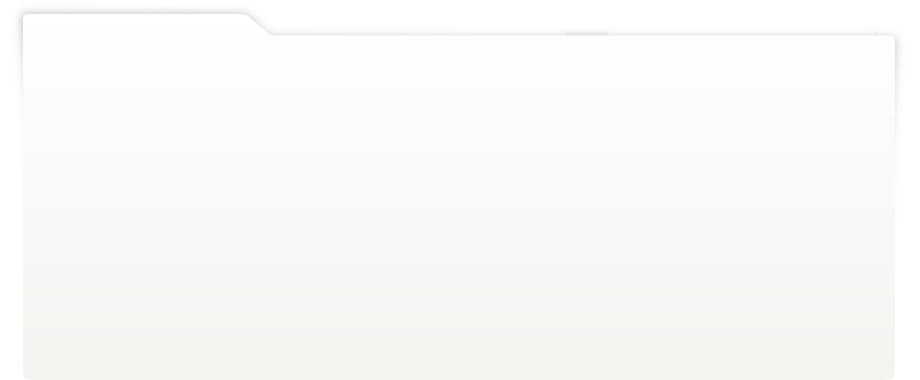
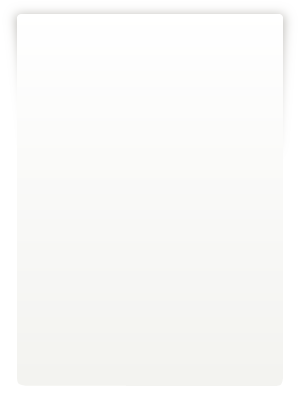
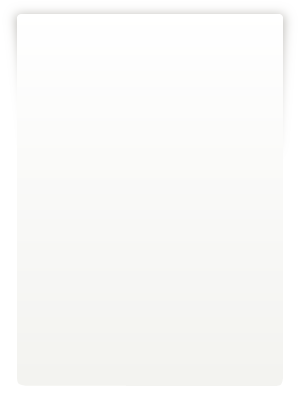
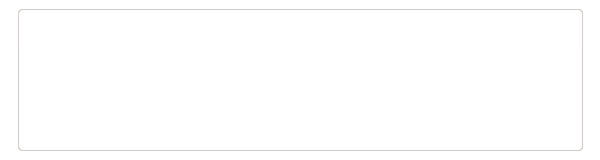
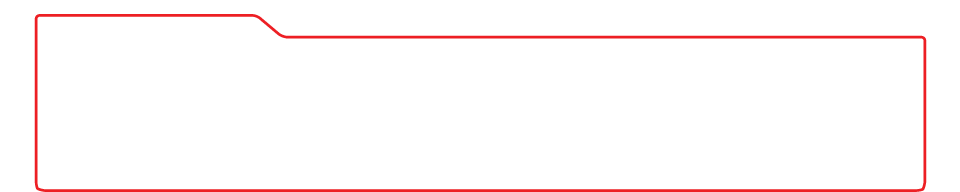
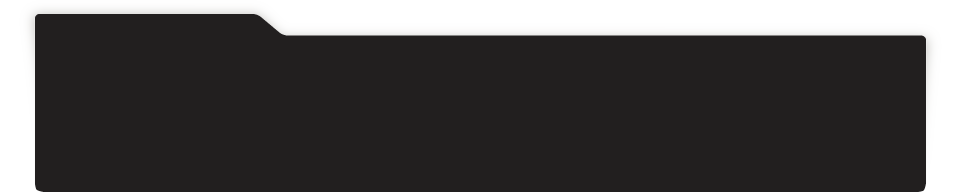
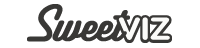
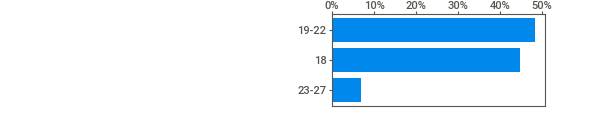
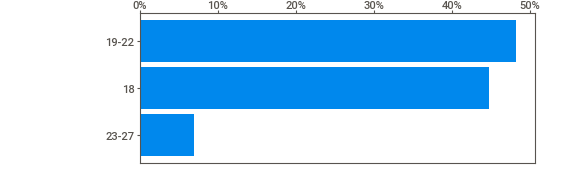
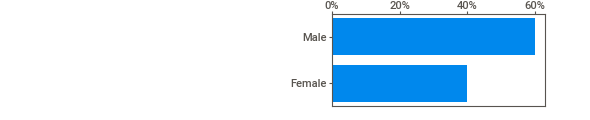
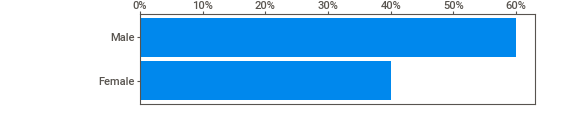
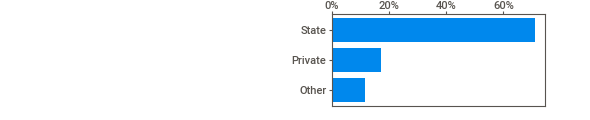
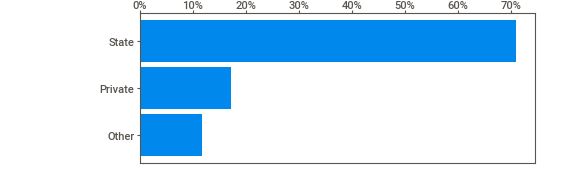
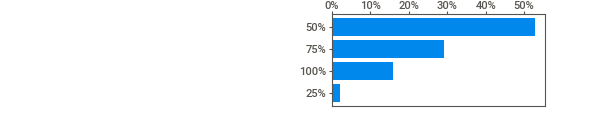
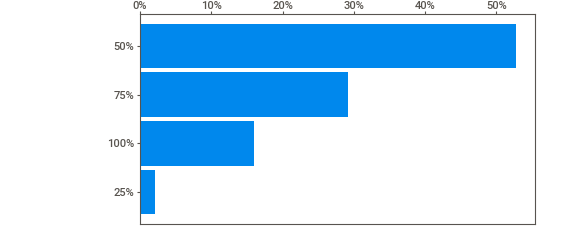
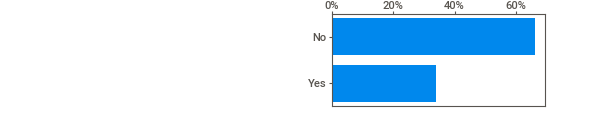
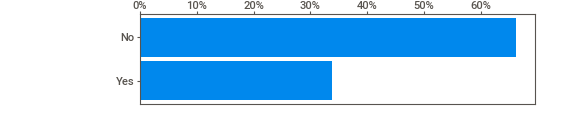
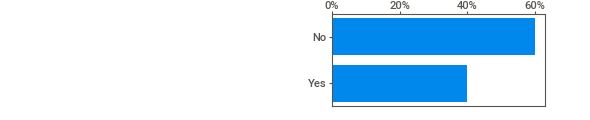
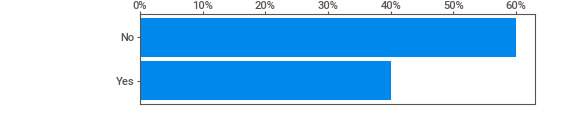
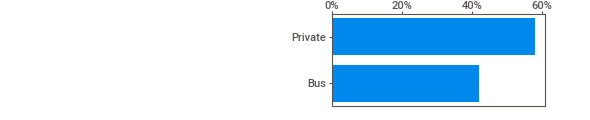
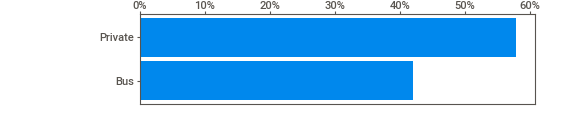
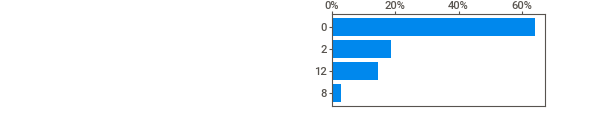
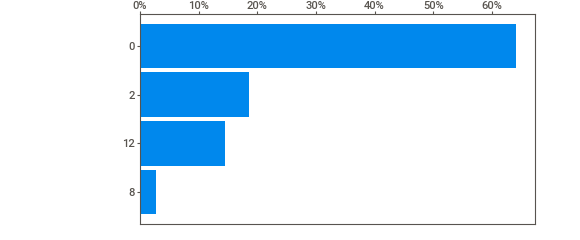
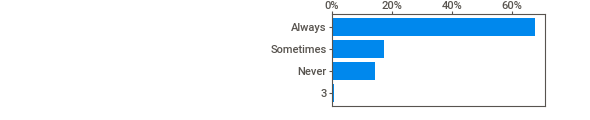
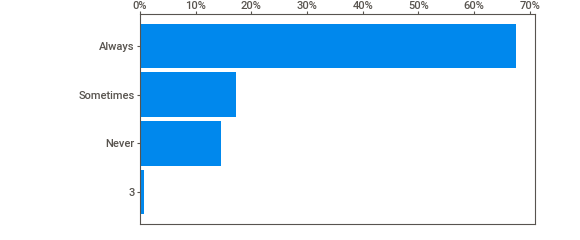
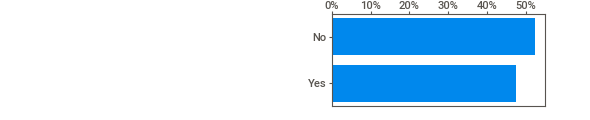
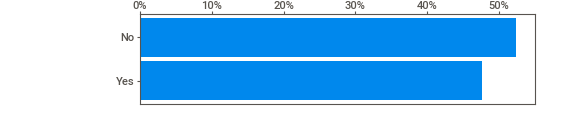
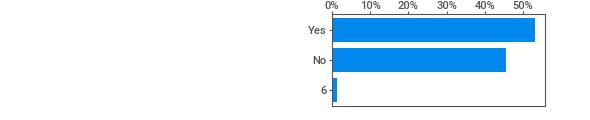
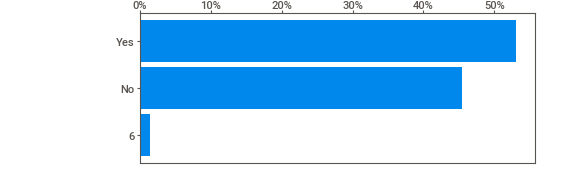
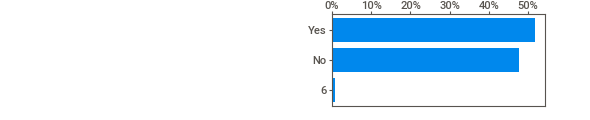
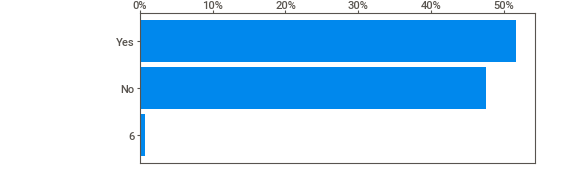
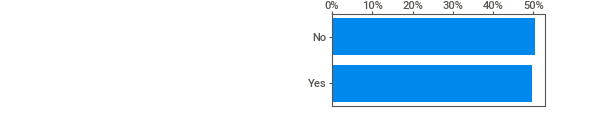
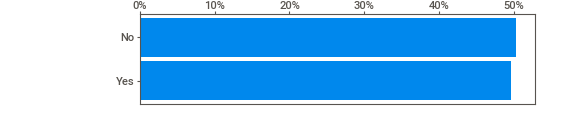
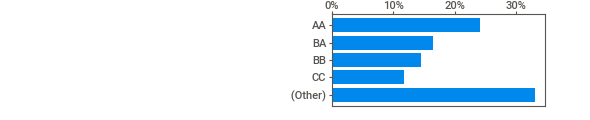
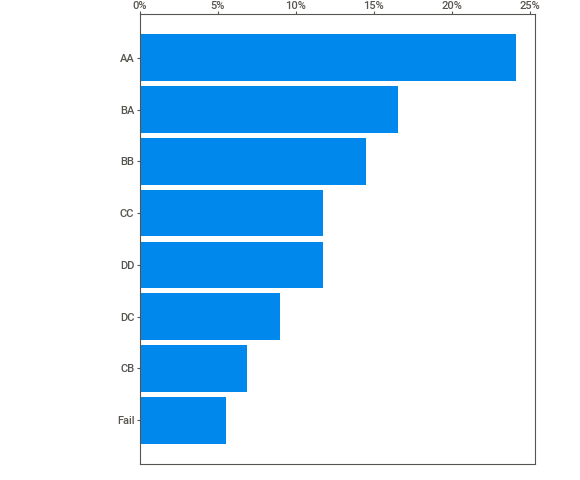
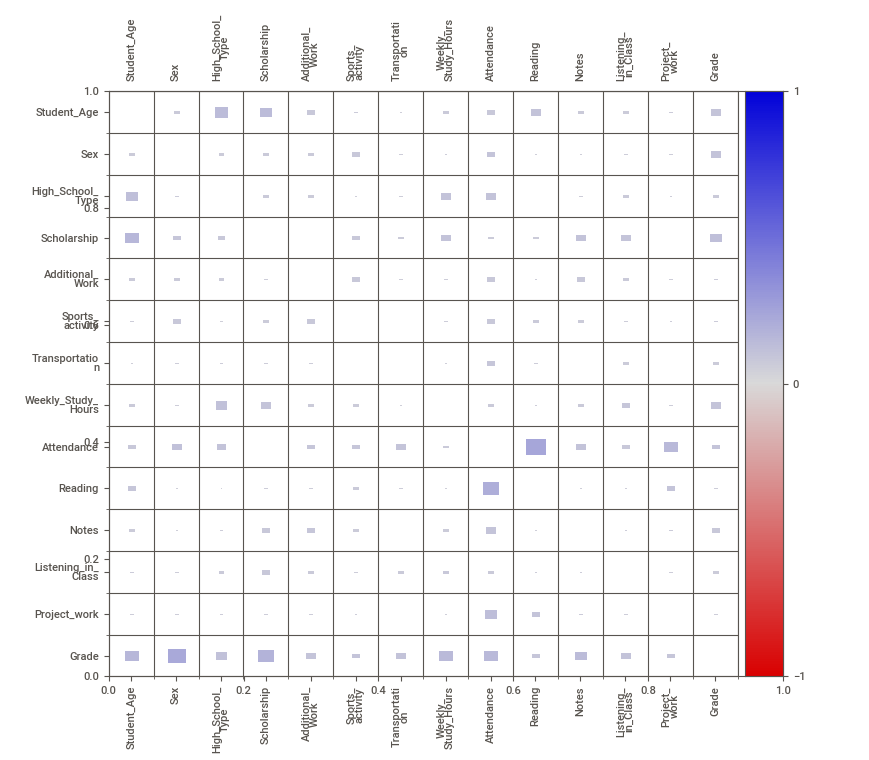
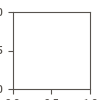

In [14]:
sw.analyze(students).show_notebook()


# Dataset preprocessing

## Students

In [15]:
students['Scholarship'] = students['Scholarship'].apply(lambda a: float(str(a).replace('%', '')))


In [16]:
def filterObjectColumns(a):
    return a == pd.CategoricalDtype

In [17]:
students.dtypes.apply(filterObjectColumns)


Student_ID             True
Student_Age            True
Sex                    True
High_School_Type       True
Scholarship           False
Additional_Work        True
Sports_activity        True
Transportation         True
Weekly_Study_Hours    False
Attendance             True
Reading                True
Notes                  True
Listening_in_Class     True
Project_work           True
Grade                  True
dtype: bool

In [18]:
students_objects_columns = students.columns[students.dtypes.apply(filterObjectColumns)]


In [19]:
students_encoded = students.copy(deep=True)

In [20]:
for i in students_objects_columns:
    lb = LabelEncoder().fit(students[i])
    students_encoded[i] = lb.transform(students[i])
    with open(f'models/students_encodedstudents_encoded_{i}', 'wb') as f:
        pickle.dump(lb, f)


In [21]:
students_encoded = students_encoded.dropna()


In [22]:
students.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50.0,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50.0,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50.0,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50.0,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50.0,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [23]:
students_encoded.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,1,1,0,50.0,1,0,1,0,1,1,2,1,0,0
1,57,1,1,0,50.0,1,0,1,0,1,1,1,2,1,0
2,68,1,1,2,50.0,0,0,1,2,2,0,1,1,1,0
3,79,0,0,1,50.0,1,0,0,2,1,0,2,1,0,0
4,90,1,1,1,50.0,0,0,0,12,1,1,1,2,1,0


## Employee

In [24]:
employees['Start_Date_Year'] = pd.to_datetime(employees['Start_Date']).dt.year
employees['Start_Date_Month'] = pd.to_datetime(employees['Start_Date']).dt.month
employees['Start_Date_Year'] = pd.to_datetime(employees['Start_Date']).dt.day
employees['End_Date_Year'] = pd.to_datetime(employees['End_Date']).dt.year
employees['End_Date_Month'] = pd.to_datetime(employees['End_Date']).dt.month
employees['End_Date_Year'] = pd.to_datetime(employees['End_Date']).dt.day
employees['Logout_Time'] = employees['Logout_Time'].apply(lambda a: int(a.split(':')[0]) + int(a.split(':')[0])/60)
employees['Login_Time'] = employees['Login_Time'].apply(lambda a: int(a.split(':')[0]) + int(a.split(':')[0])/60)
employees['Joining_Date_Year'] = pd.to_datetime(employees['Joining_Date']).dt.year
employees['Joining_Date_Month'] = pd.to_datetime(employees['Joining_Date']).dt.month
employees['Joining_Date_Year'] = pd.to_datetime(employees['Joining_Date']).dt.day
employees = employees.drop(['Employee_Name', 'End_Date', 'Start_Date', 'Joining_Date'], axis=1)


In [25]:
employees.head()


,Employee_Id,Project_Id,Allocated_Days,Completed_In_Days,Login_Time,Logout_Time,isOnTime,Appraisal_Cycles,Start_Date_Year,Start_Date_Month,End_Date_Year,End_Date_Month,Joining_Date_Year,Joining_Date_Month
0,0,7175,863,856,9.150000,7.116667,1,2,9,6,13,10,13,7
1,1,5869,110,114,10.166667,7.116667,1,0,27,5,18,9,7,8
2,2,7692,630,626,10.166667,7.116667,0,1,6,5,22,1,24,10
3,3,5414,629,638,10.166667,8.133333,1,0,26,12,24,9,23,10
4,4,7774,1358,1358,10.166667,7.116667,0,4,28,4,15,1,3,4


In [26]:
def filterObjectColumns(a):
    return a == pd.CategoricalDtype

In [27]:
employees.dtypes.apply(filterObjectColumns)


Employee_Id           False
Project_Id            False
Allocated_Days        False
Completed_In_Days     False
Login_Time            False
Logout_Time           False
isOnTime              False
Appraisal_Cycles      False
Start_Date_Year       False
Start_Date_Month      False
End_Date_Year         False
End_Date_Month        False
Joining_Date_Year     False
Joining_Date_Month    False
dtype: bool

In [28]:
employees_object_columns = employees.columns[employees.dtypes.apply(filterObjectColumns)]


In [29]:
employees_encoded = employees.copy(deep=True)


In [30]:
for i in employees_object_columns:
    lb = LabelEncoder().fit(employees[i])
    employees_encoded[i] = lb.transform(employees[i])
    with open(f'models/employees_encodedstudents_encoded_{i}', 'wb') as f:
        pickle.dump(lb, f)



In [31]:
employees.head()


,Employee_Id,Project_Id,Allocated_Days,Completed_In_Days,Login_Time,Logout_Time,isOnTime,Appraisal_Cycles,Start_Date_Year,Start_Date_Month,End_Date_Year,End_Date_Month,Joining_Date_Year,Joining_Date_Month
0,0,7175,863,856,9.150000,7.116667,1,2,9,6,13,10,13,7
1,1,5869,110,114,10.166667,7.116667,1,0,27,5,18,9,7,8
2,2,7692,630,626,10.166667,7.116667,0,1,6,5,22,1,24,10
3,3,5414,629,638,10.166667,8.133333,1,0,26,12,24,9,23,10
4,4,7774,1358,1358,10.166667,7.116667,0,4,28,4,15,1,3,4


In [32]:
employees_encoded.head()


,Employee_Id,Project_Id,Allocated_Days,Completed_In_Days,Login_Time,Logout_Time,isOnTime,Appraisal_Cycles,Start_Date_Year,Start_Date_Month,End_Date_Year,End_Date_Month,Joining_Date_Year,Joining_Date_Month
0,0,7175,863,856,9.150000,7.116667,1,2,9,6,13,10,13,7
1,1,5869,110,114,10.166667,7.116667,1,0,27,5,18,9,7,8
2,2,7692,630,626,10.166667,7.116667,0,1,6,5,22,1,24,10
3,3,5414,629,638,10.166667,8.133333,1,0,26,12,24,9,23,10
4,4,7774,1358,1358,10.166667,7.116667,0,4,28,4,15,1,3,4


# Analize

## Students

In [33]:
students_encoded.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,1,1,0,50.0,1,0,1,0,1,1,2,1,0,0
1,57,1,1,0,50.0,1,0,1,0,1,1,1,2,1,0
2,68,1,1,2,50.0,0,0,1,2,2,0,1,1,1,0
3,79,0,0,1,50.0,1,0,0,2,1,0,2,1,0,0
4,90,1,1,1,50.0,0,0,0,12,1,1,1,2,1,0


In [34]:
not_imported_column_for_students = [
    'Student_ID',
    'Scholarship',
    'Attendance',
    'Scholarship',
    'Weekly_Study_Hours'
]
pred_params = [
    'Attendance'
]


In [35]:
students_params = students_encoded.drop(not_imported_column_for_students, axis=1)
attendence = students_encoded.loc[:, pred_params]


<Axes: >

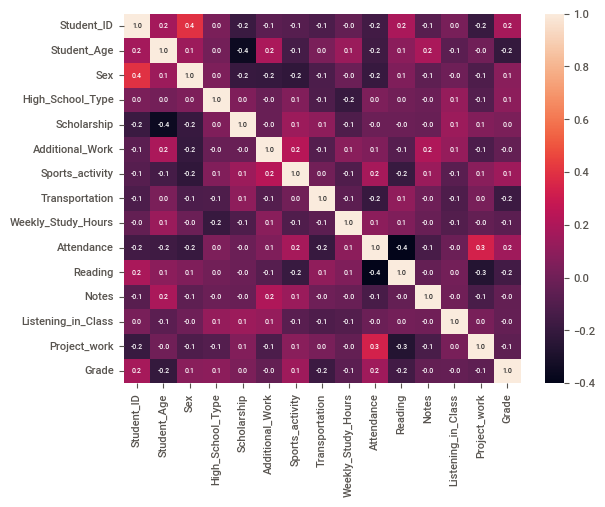

In [36]:
seaborn.heatmap(students_encoded.corr(), annot=True, annot_kws={"size":5}, fmt=".1f")


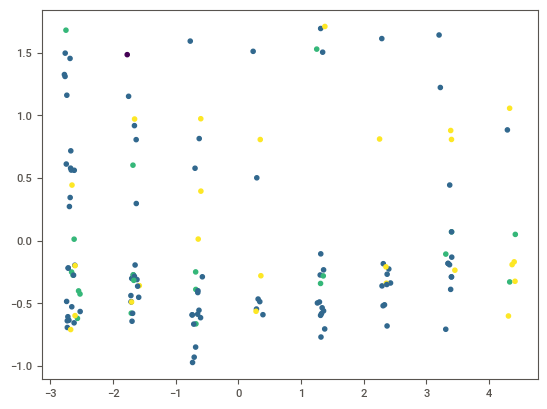

In [38]:
x1, x2 = PCA(n_components=2).fit_transform(students_params, attendence).T
x_usefull = PCA(n_components=10).fit_transform(students_params, attendence).T
plt.scatter(x1, x2, c=attendence.to_numpy())

In [39]:
students_encoded2 = students_encoded.copy()


In [40]:
for i, j in enumerate(x_usefull):
    students_encoded2[f'test_x_{i}'] = j


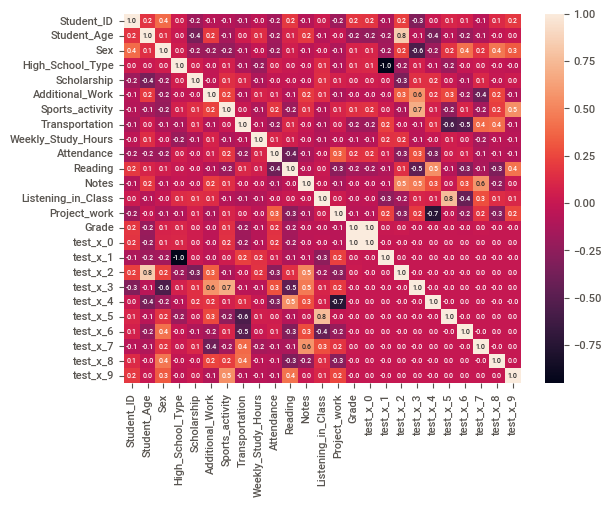

In [41]:
ax = seaborn.heatmap(students_encoded2.corr(), annot=True, annot_kws={"size":5}, fmt=".1f")


Имеют смысл параметры:
- возраст;
- наличие транспорта;
- наличие доп проектов;

т.к. их сохранила PCA

## Employees

In [42]:
employees.head()

,Employee_Id,Project_Id,Allocated_Days,Completed_In_Days,Login_Time,Logout_Time,isOnTime,Appraisal_Cycles,Start_Date_Year,Start_Date_Month,End_Date_Year,End_Date_Month,Joining_Date_Year,Joining_Date_Month
0,0,7175,863,856,9.150000,7.116667,1,2,9,6,13,10,13,7
1,1,5869,110,114,10.166667,7.116667,1,0,27,5,18,9,7,8
2,2,7692,630,626,10.166667,7.116667,0,1,6,5,22,1,24,10
3,3,5414,629,638,10.166667,8.133333,1,0,26,12,24,9,23,10
4,4,7774,1358,1358,10.166667,7.116667,0,4,28,4,15,1,3,4


In [43]:
not_imported_col = ['Employee_Id', 'Project_Id',
                    'Allocated_Days', 'Completed_In_Days', 'Login_Time']


In [44]:
employees['isOnTime']


0        1
1        1
2        0
3        1
4        0
        ..
10818    1
10819    0
10820    0
10821    0
10822    0
Name: isOnTime, Length: 10823, dtype: int64

## Employees2

In [45]:
employees2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [46]:
k_v_emp2 = dict()


In [47]:
def fac(a: pd.Series):
    v, k = pd.factorize(a)
    k_v_emp2[a.name] = k
    return v


In [48]:
emp2_cat_col = [
    'department',
    'region',
    'education',
    'gender',
    'recruitment_channel'
]


In [49]:
employees2_lb_enc = employees2.apply(lambda a: fac(a) if a.name in emp2_cat_col else a)
employees2_lb_enc


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,0,0,0,0,0,1,24,NaN,1,1,0,77
1,74430,1,1,0,1,1,1,31,3.0,5,0,0,51
2,72255,2,2,0,0,1,1,31,1.0,4,0,0,47
3,38562,3,3,0,1,1,3,31,2.0,9,0,0,65
4,64486,4,4,0,0,0,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,0,5,0,1,2,2,30,5.0,6,1,0,81
17413,49584,1,5,0,0,1,1,33,1.0,9,0,0,51
17414,49584,1,5,0,0,1,1,33,1.0,9,0,0,51
17415,49584,1,5,0,0,1,1,33,1.0,9,0,0,51


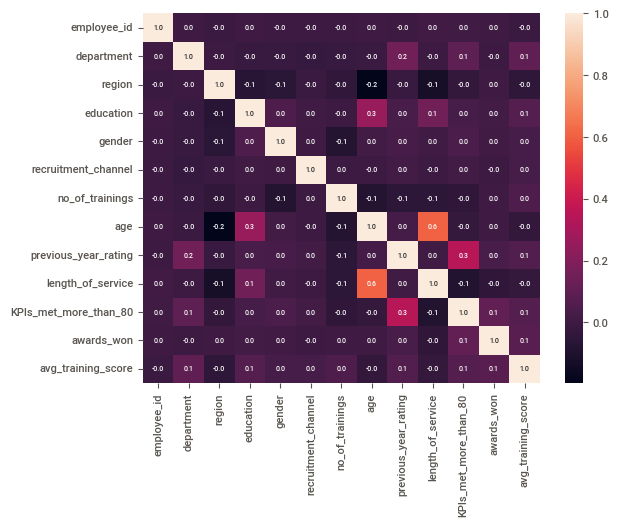

In [50]:
ax = seaborn.heatmap(employees2_lb_enc.dropna().corr(), annot=True, annot_kws={"size": 5}, fmt=".1f")
